In [4]:
#Importacion de todas las librerias necesarias 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from scipy.stats import ks_2samp
import scipy.stats as stats 

ANALISIS para TVAE

In [6]:
#Cargar los datos reales y sinteticos
df_real = pd.read_csv('final_static_data.csv',index_col=0)
df_synth = pd.read_csv('synthetic_static_completo_TVAE.csv',index_col=0)

In [7]:
print(df_real.columns)
print(df_synth.columns)

Index(['draught', 'to_bow', 'to_stern', 'to_port', 'to_starboard', 'len',
       'wid', 'ldivw', 'ldivd', 'wdivd', 'area', 'grith', 'aml', 'amt', 'vs',
       'aol', 'shiptype'],
      dtype='object')
Index(['draught', 'to_bow', 'to_stern', 'to_port', 'to_starboard', 'len',
       'wid', 'ldivw', 'ldivd', 'wdivd', 'area', 'grith', 'aml', 'amt', 'vs',
       'aol', 'shiptype'],
      dtype='object')


In [8]:
print("Tipos de barco en datos reales:", df_real["shiptype"].unique())
print("Tipos de barco en datos sintéticos:", df_synth["shiptype"].unique())

Tipos de barco en datos reales: ['ShipType.Tug' 'ShipType.Fishing' 'ShipType.Cargo' 'ShipType.Passenger'
 'ShipType.Tanker']
Tipos de barco en datos sintéticos: ['ShipType.Tanker' 'ShipType.Cargo' 'ShipType.Fishing'
 'ShipType.Passenger' 'ShipType.Tug']


In [9]:
# Obtener los tipos de barco únicos
tipos_barco = df_real["shiptype"].unique()

Procesando ShipType.Tug...
   - Generando gráfico para draught


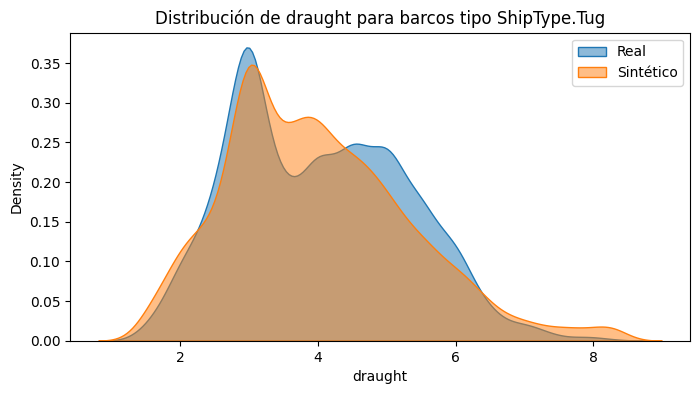

   - Generando gráfico para to_bow


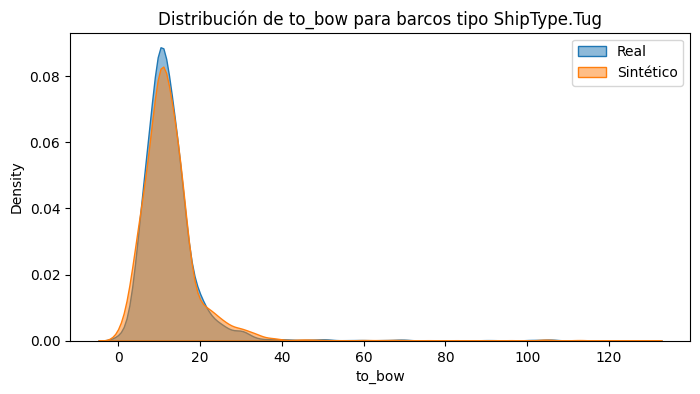

   - Generando gráfico para to_stern


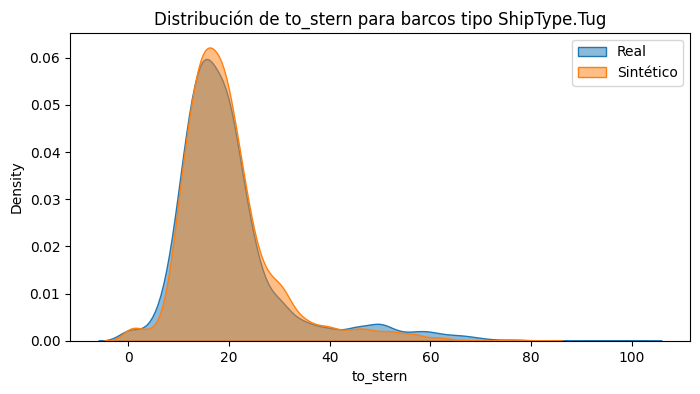

   - Generando gráfico para to_port


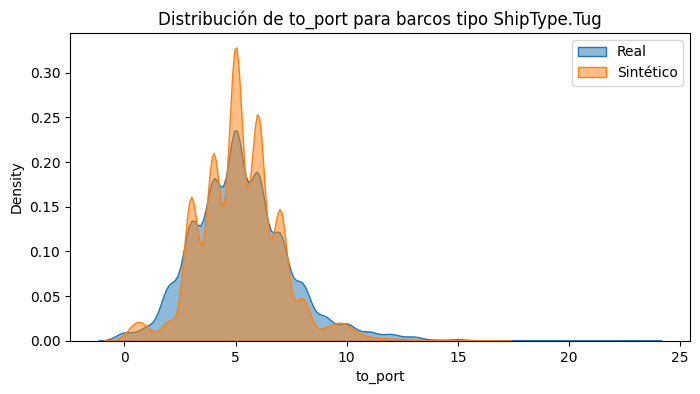

   - Generando gráfico para to_starboard


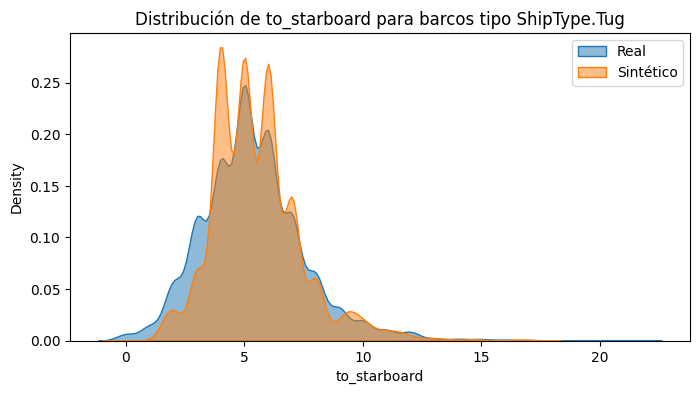

   - Generando gráfico para len


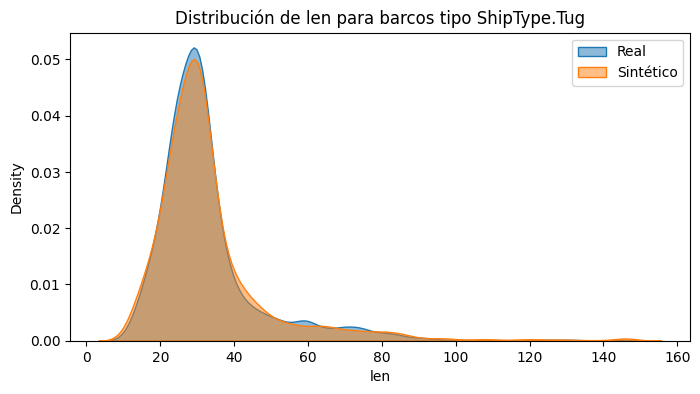

   - Generando gráfico para wid


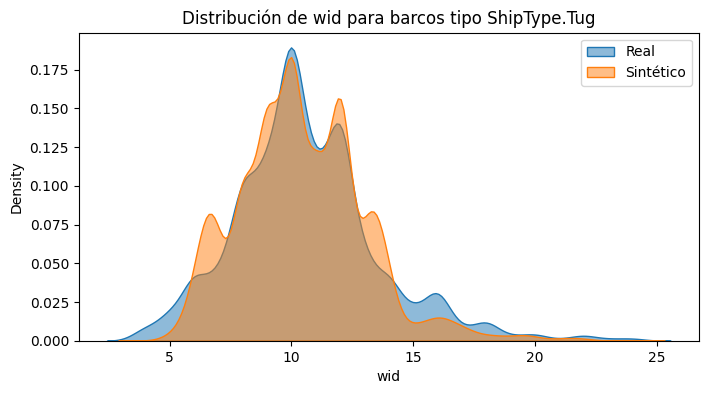

   - Generando gráfico para ldivw


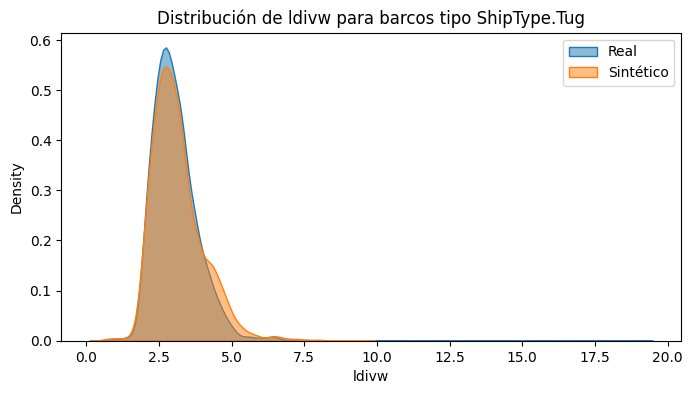

   - Generando gráfico para ldivd


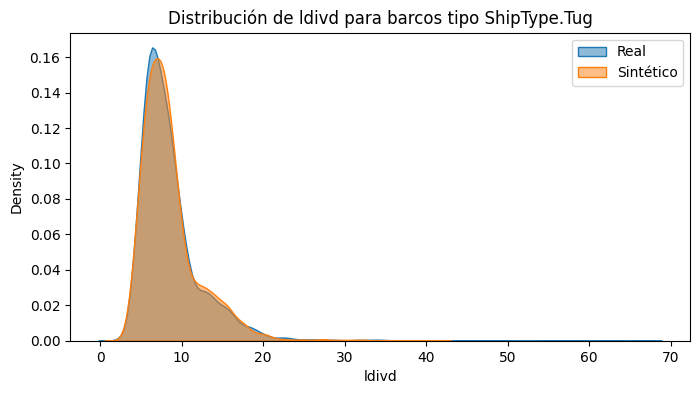

   - Generando gráfico para wdivd


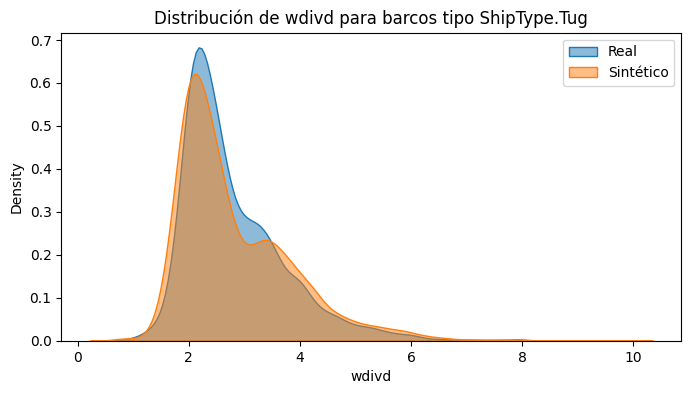

   - Generando gráfico para area


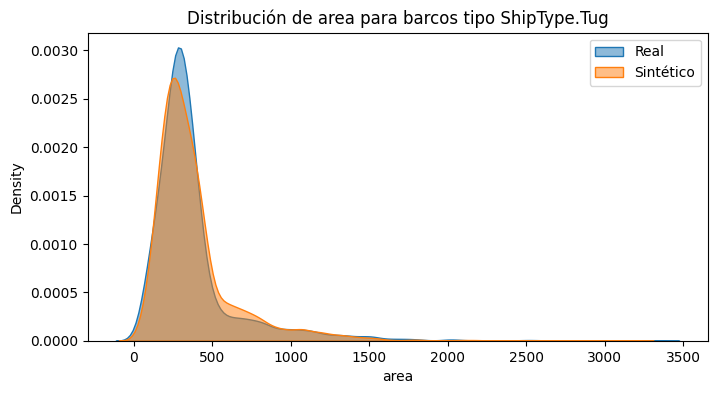

   - Generando gráfico para grith


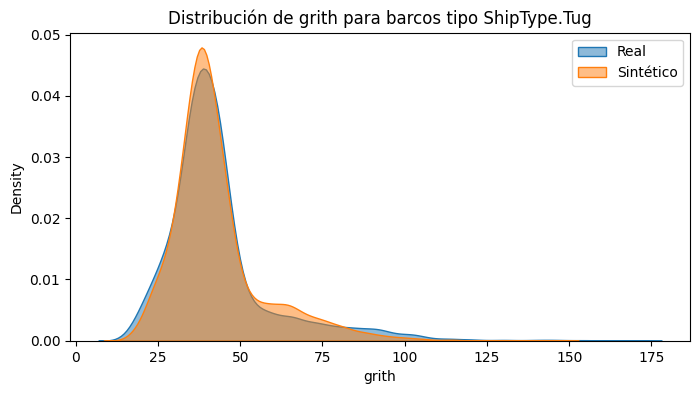

   - Generando gráfico para aml


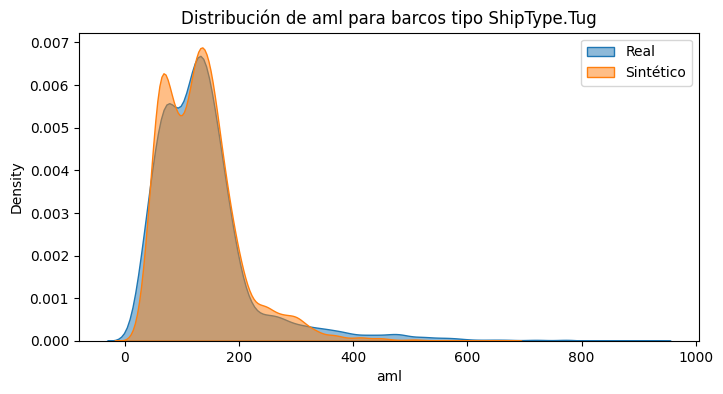

   - Generando gráfico para amt


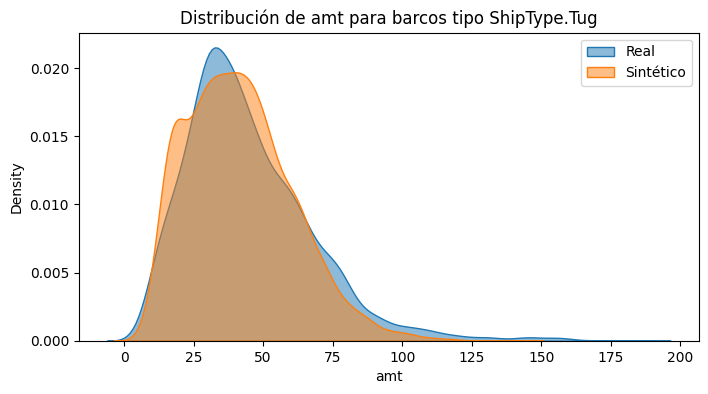

   - Generando gráfico para vs


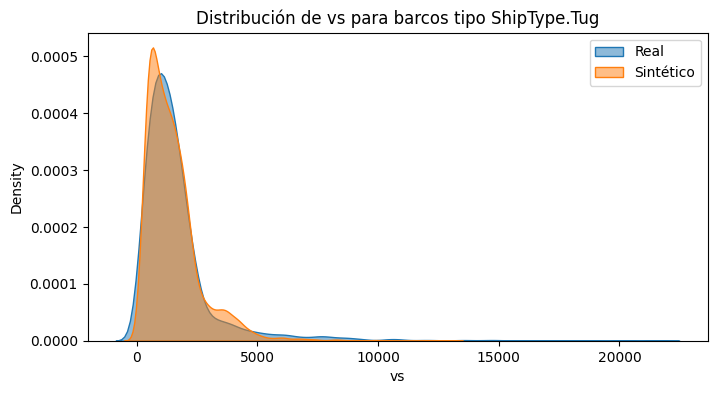

   - Generando gráfico para aol


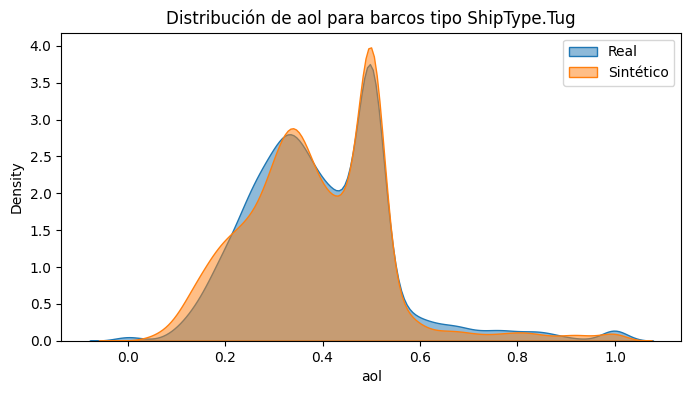

Procesando ShipType.Fishing...
   - Generando gráfico para draught


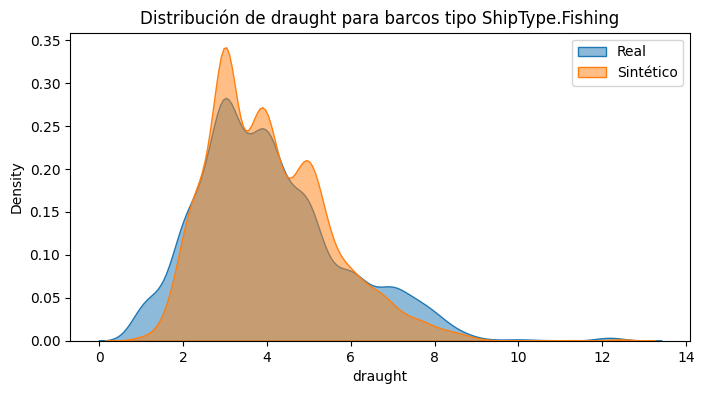

   - Generando gráfico para to_bow


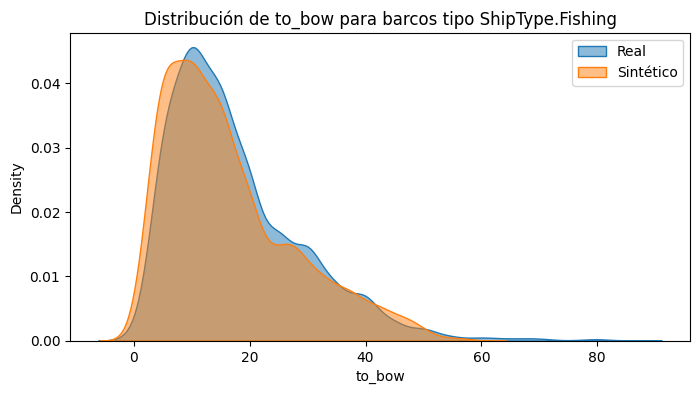

   - Generando gráfico para to_stern


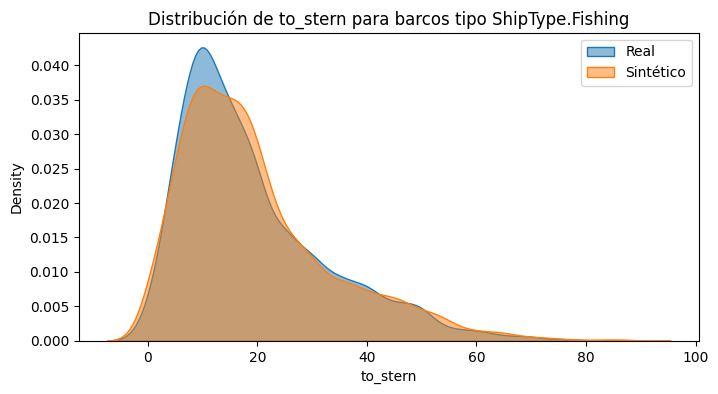

   - Generando gráfico para to_port


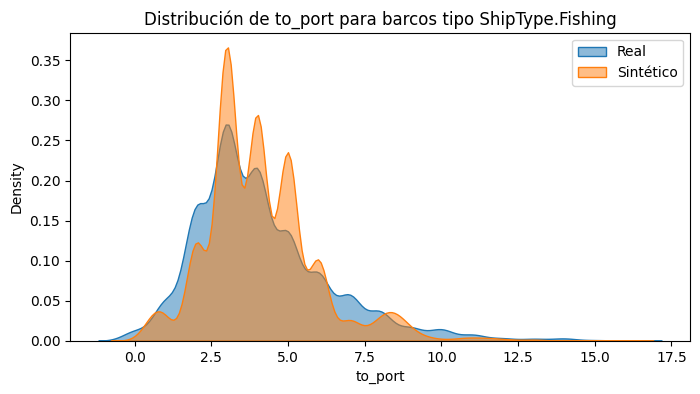

   - Generando gráfico para to_starboard


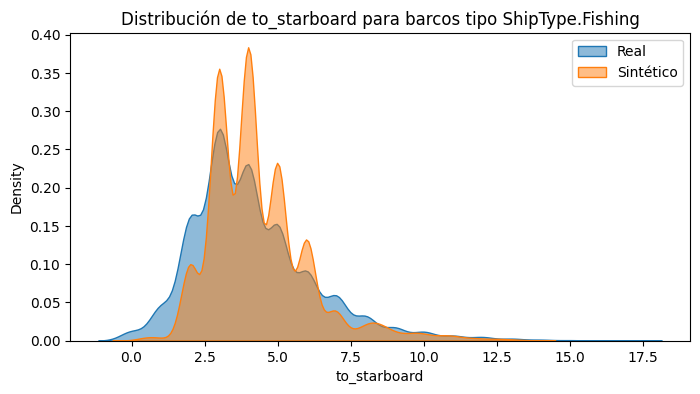

   - Generando gráfico para len


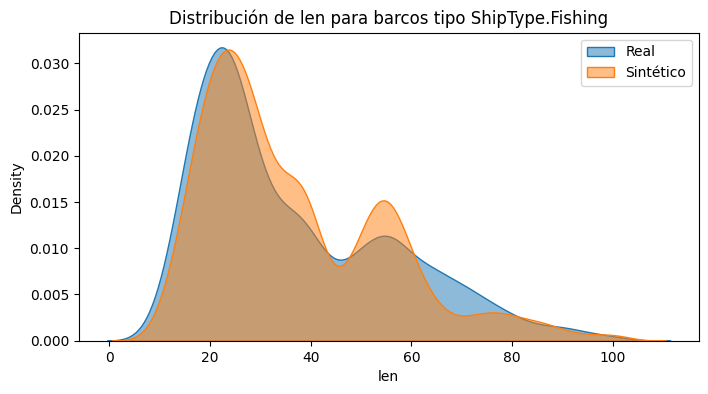

   - Generando gráfico para wid


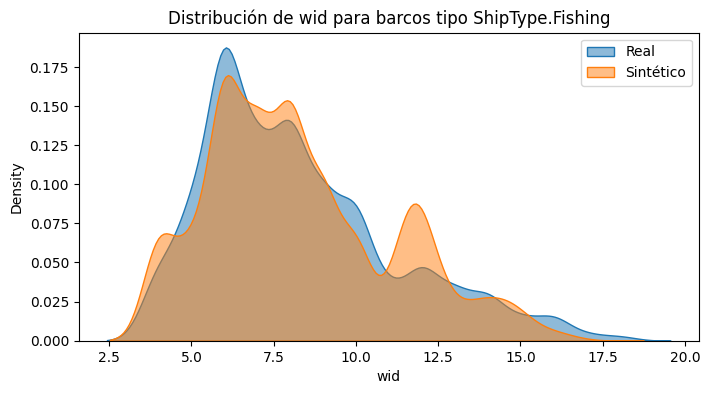

   - Generando gráfico para ldivw


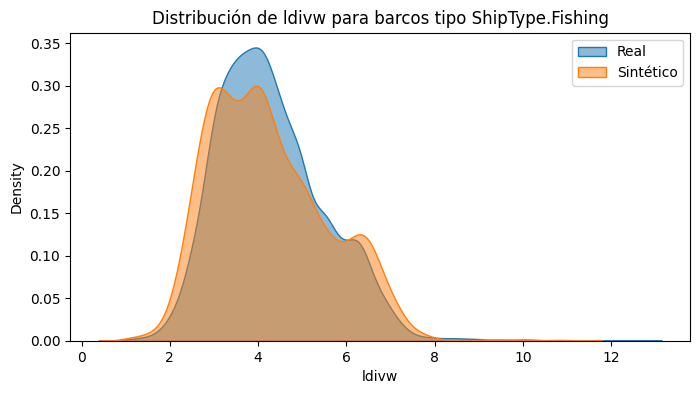

   - Generando gráfico para ldivd


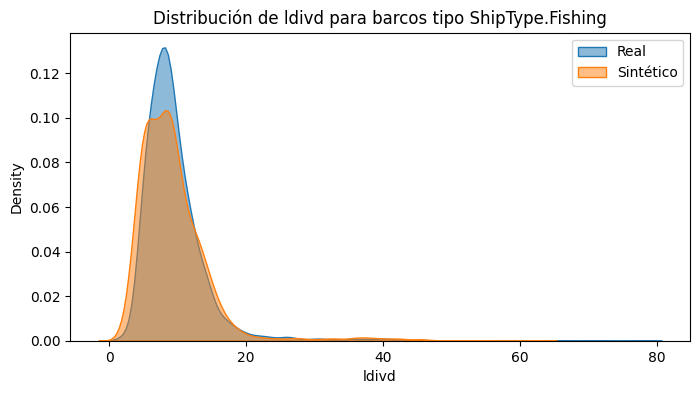

   - Generando gráfico para wdivd


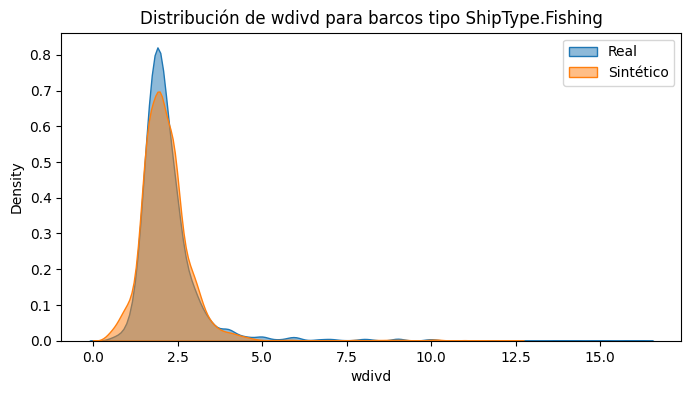

   - Generando gráfico para area


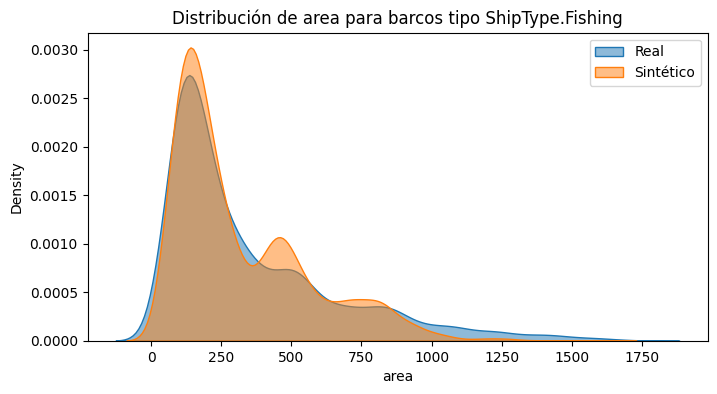

   - Generando gráfico para grith


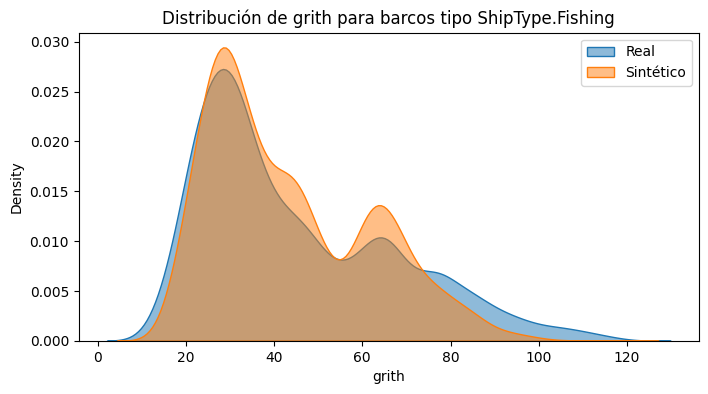

   - Generando gráfico para aml


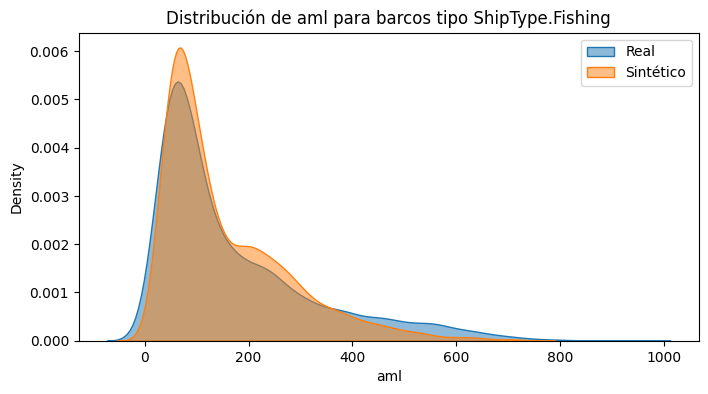

   - Generando gráfico para amt


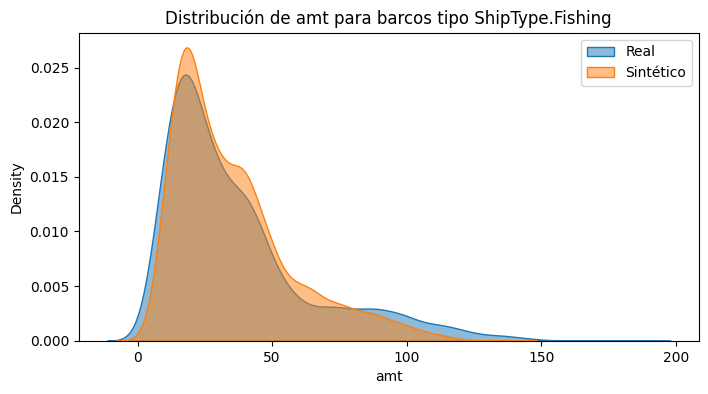

   - Generando gráfico para vs


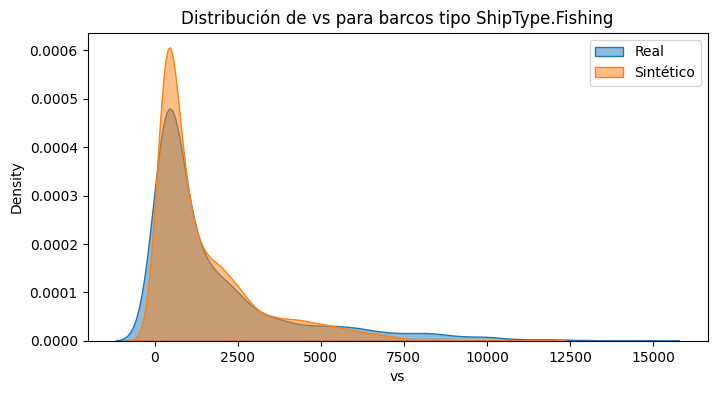

   - Generando gráfico para aol


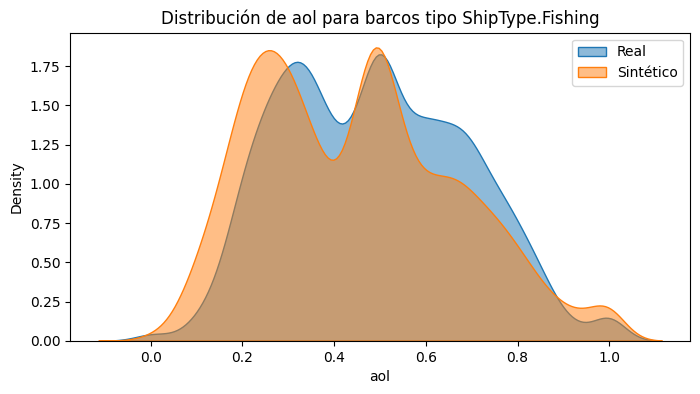

Procesando ShipType.Cargo...
   - Generando gráfico para draught


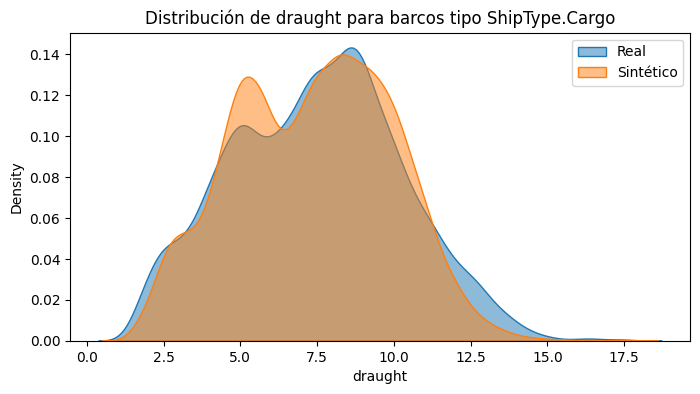

   - Generando gráfico para to_bow


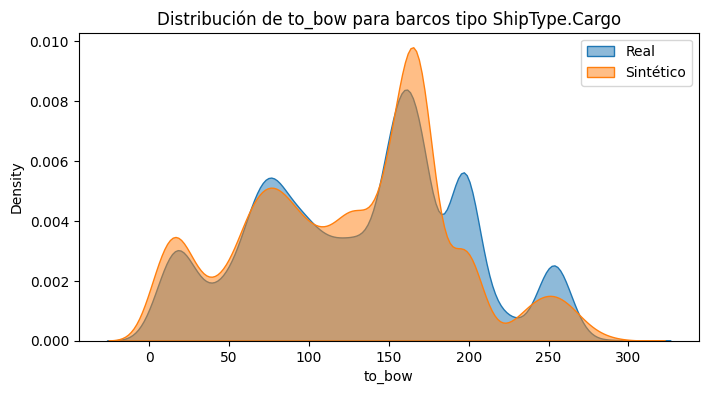

   - Generando gráfico para to_stern


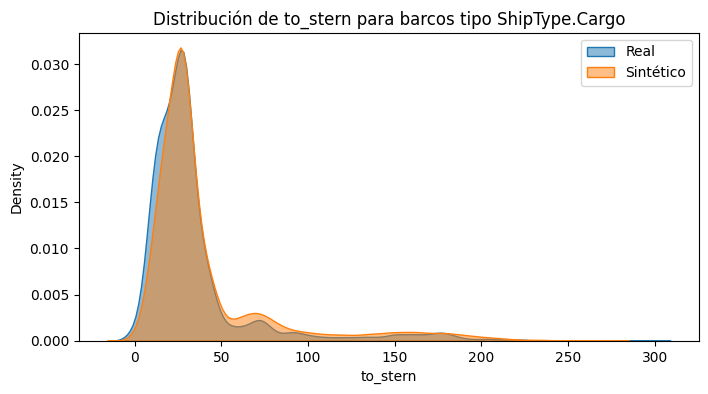

   - Generando gráfico para to_port


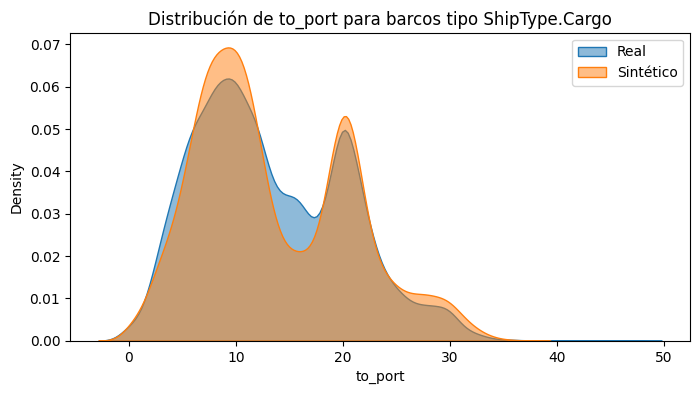

   - Generando gráfico para to_starboard


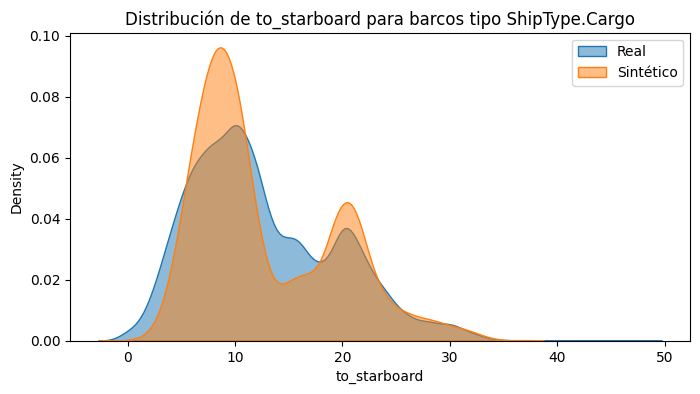

   - Generando gráfico para len


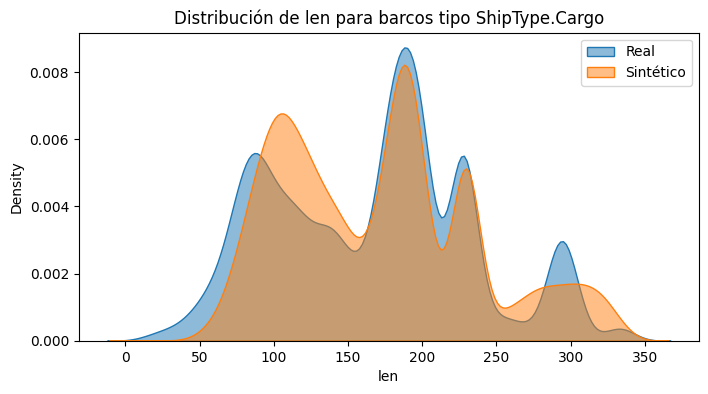

   - Generando gráfico para wid


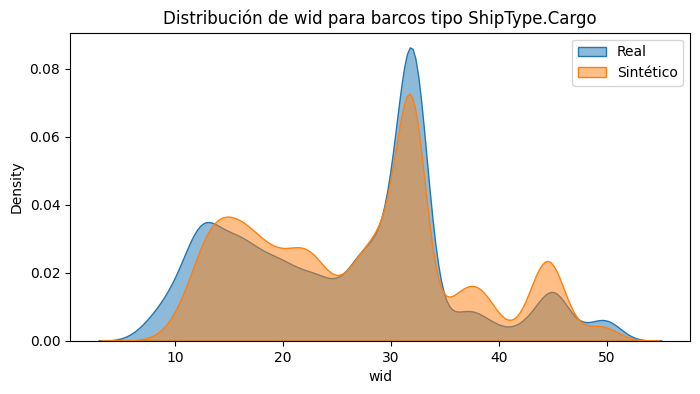

   - Generando gráfico para ldivw


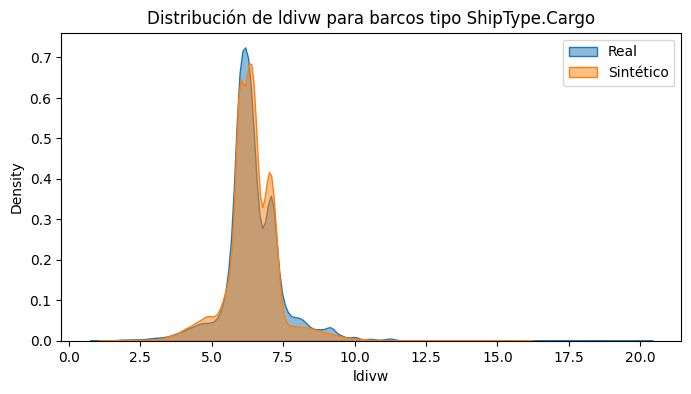

   - Generando gráfico para ldivd


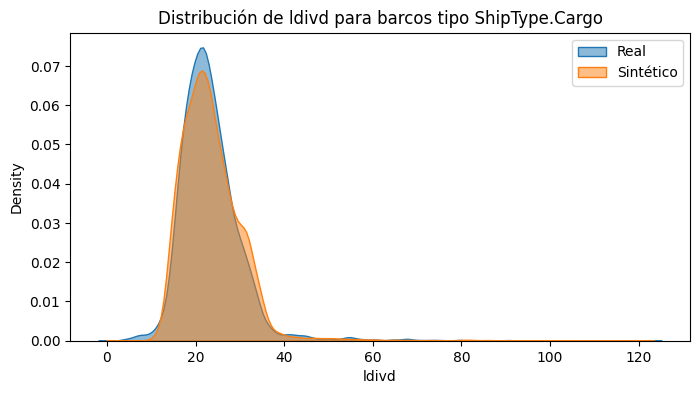

   - Generando gráfico para wdivd


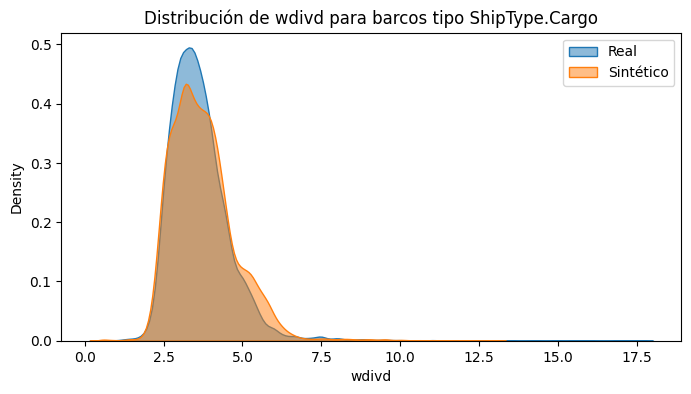

   - Generando gráfico para area


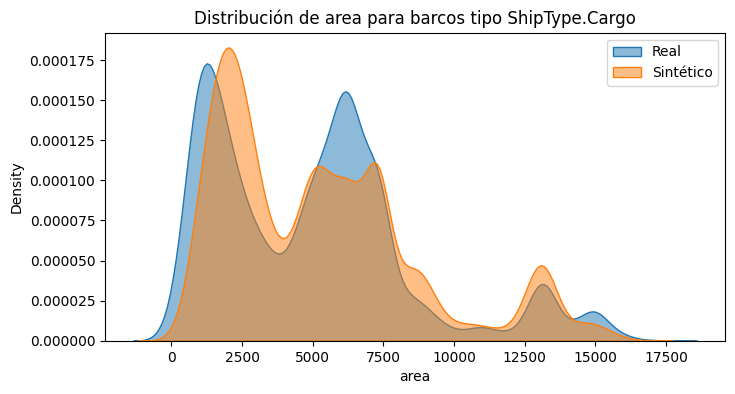

   - Generando gráfico para grith


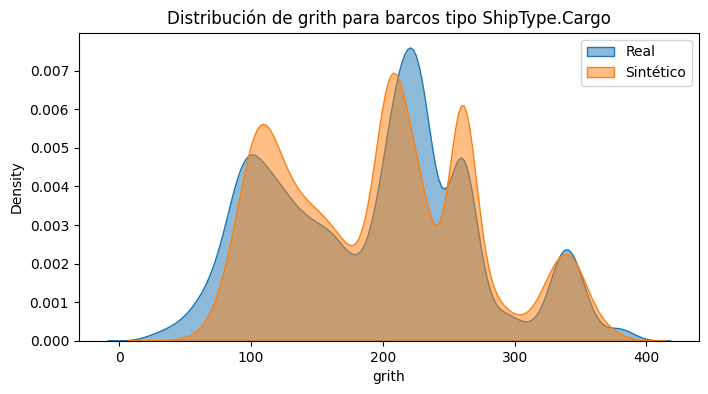

   - Generando gráfico para aml


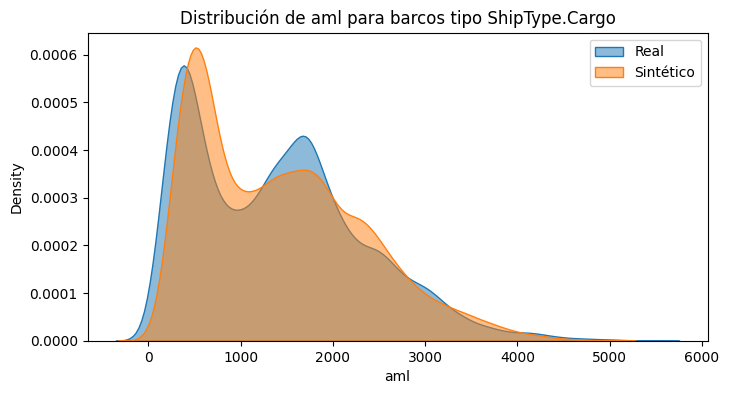

   - Generando gráfico para amt


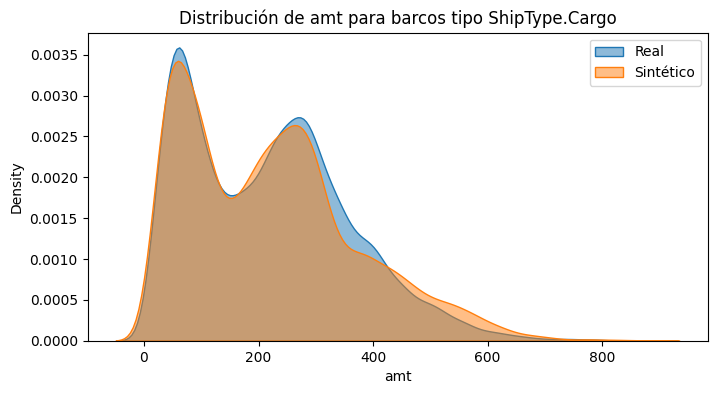

   - Generando gráfico para vs


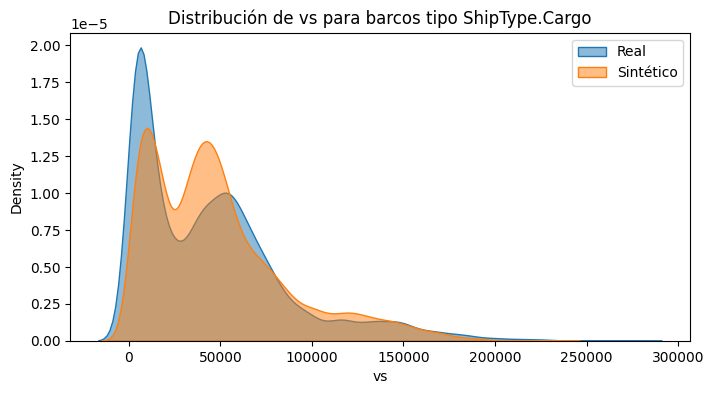

   - Generando gráfico para aol


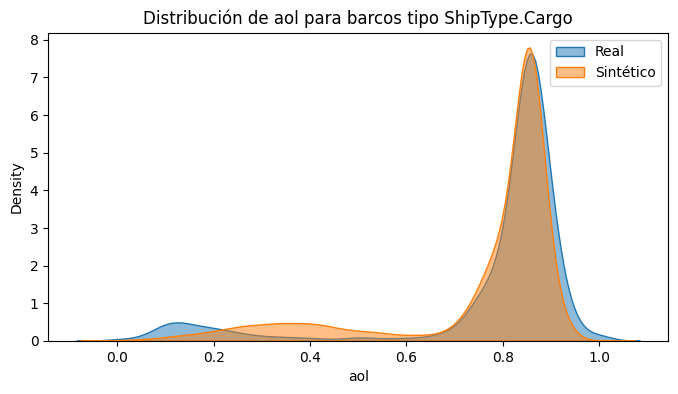

Procesando ShipType.Passenger...
   - Generando gráfico para draught


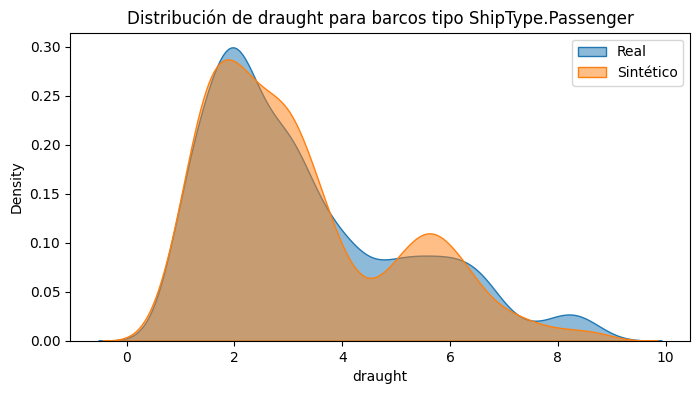

   - Generando gráfico para to_bow


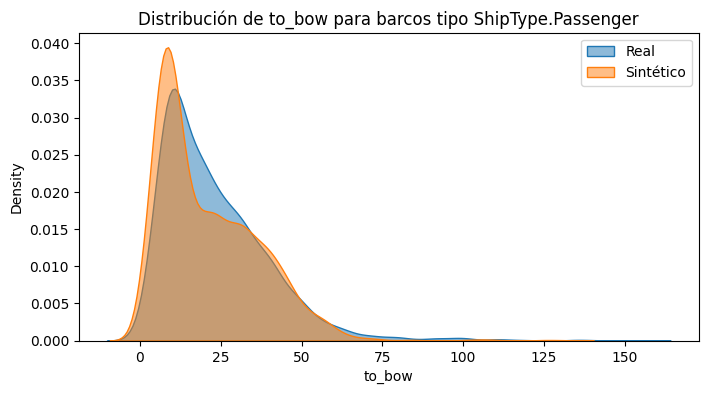

   - Generando gráfico para to_stern


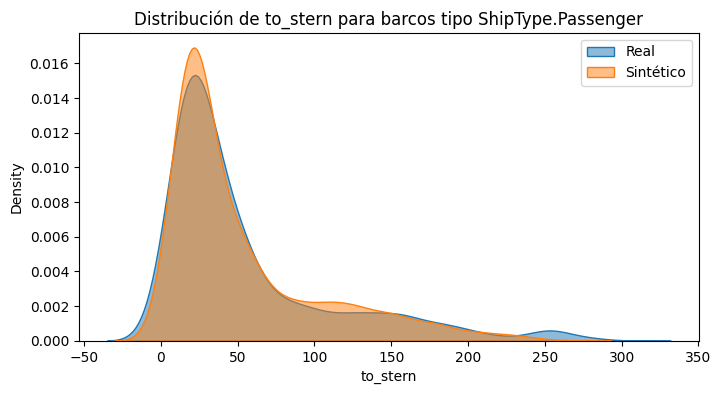

   - Generando gráfico para to_port


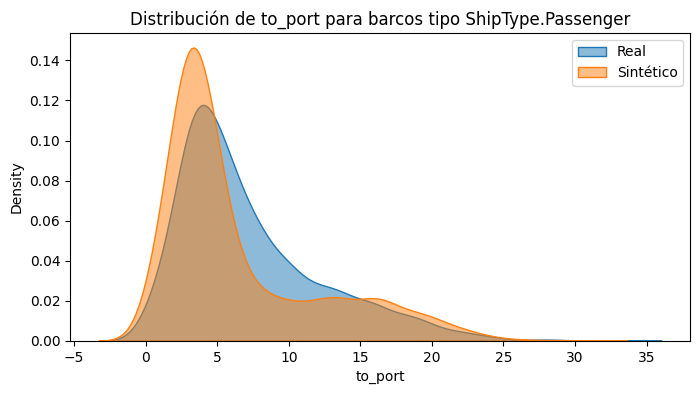

   - Generando gráfico para to_starboard


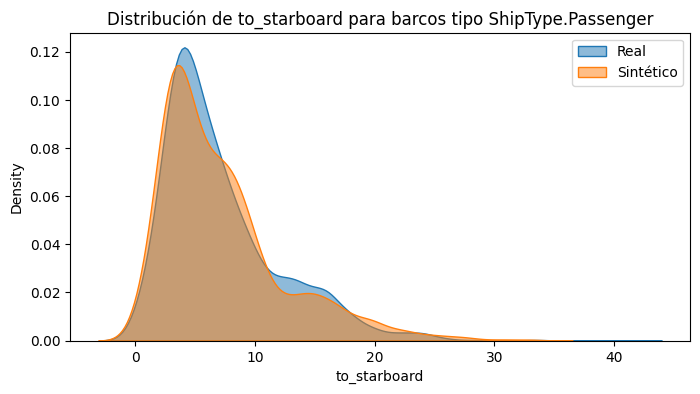

   - Generando gráfico para len


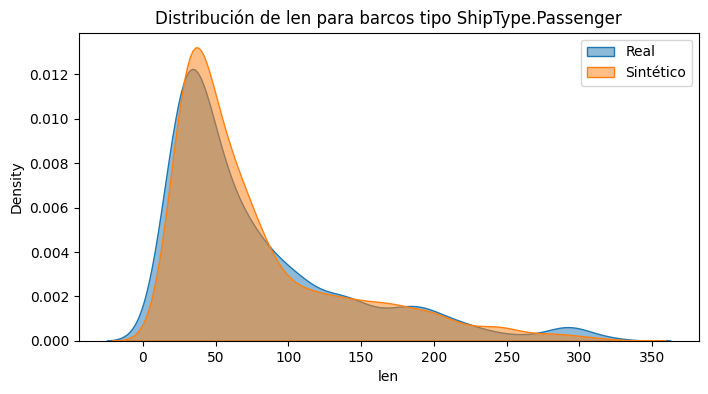

   - Generando gráfico para wid


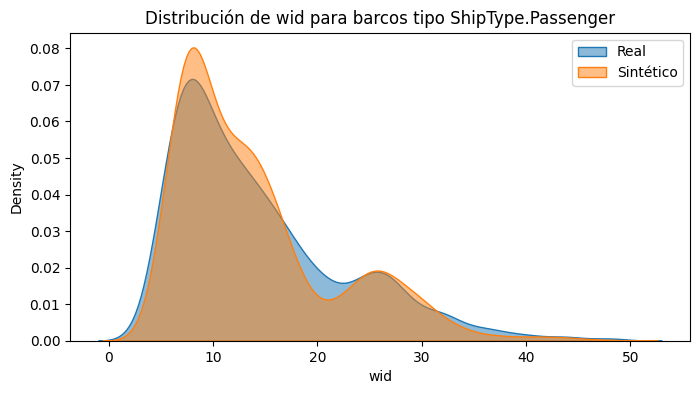

   - Generando gráfico para ldivw


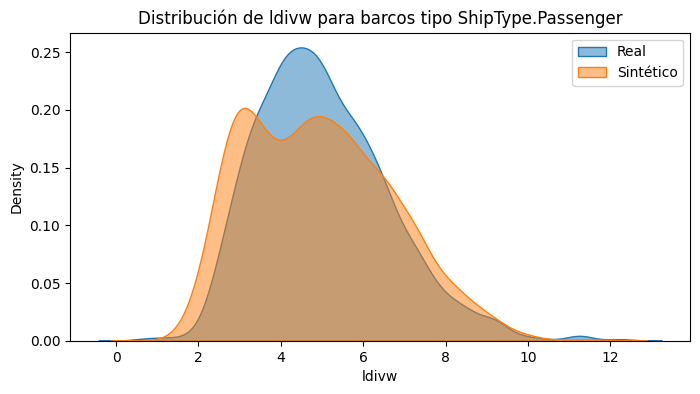

   - Generando gráfico para ldivd


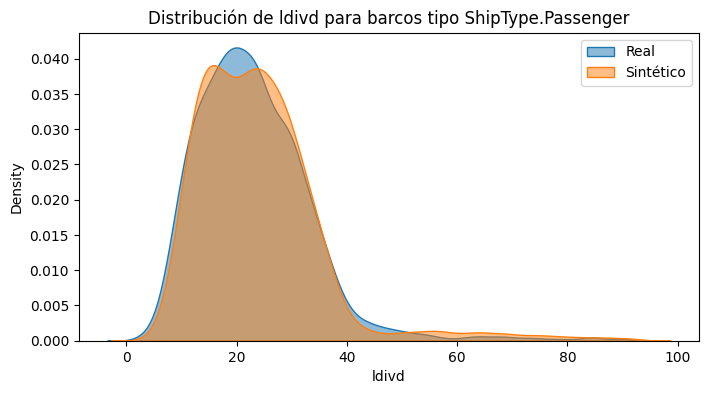

   - Generando gráfico para wdivd


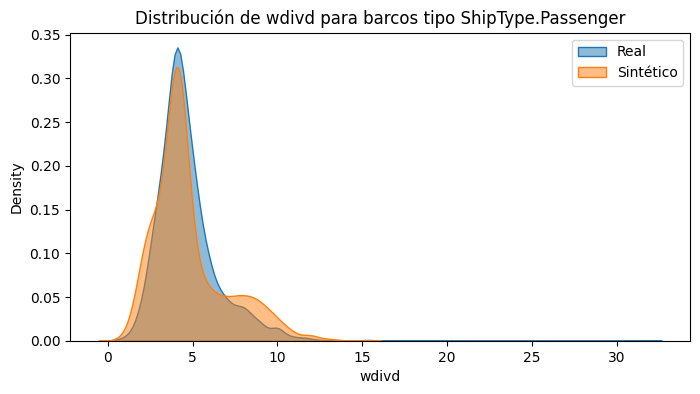

   - Generando gráfico para area


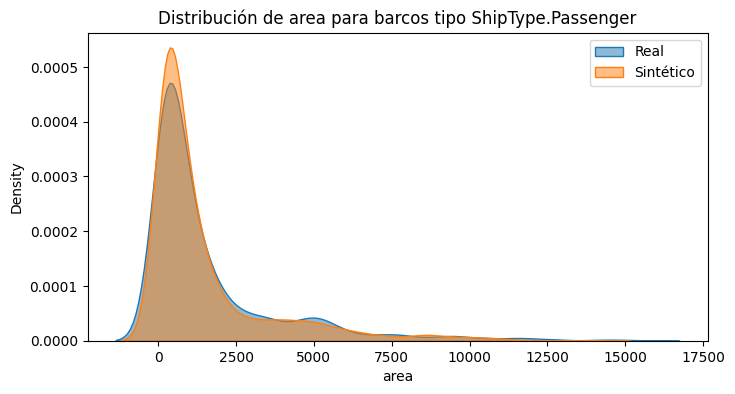

   - Generando gráfico para grith


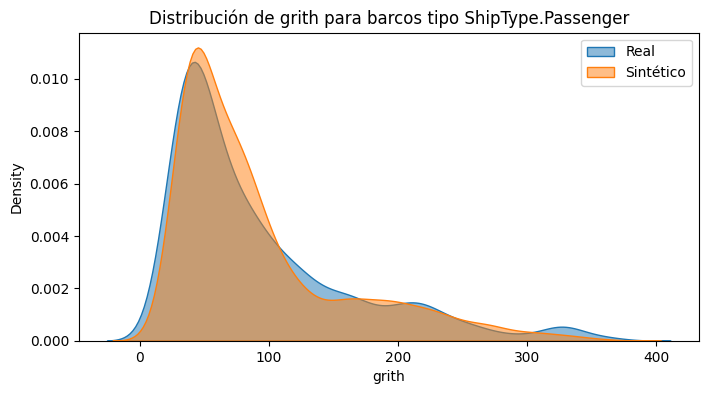

   - Generando gráfico para aml


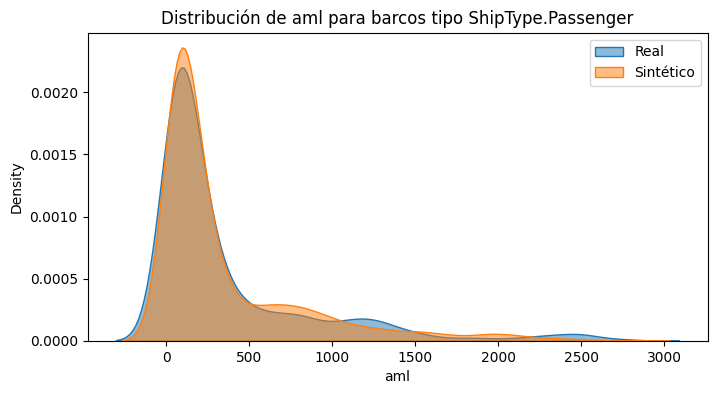

   - Generando gráfico para amt


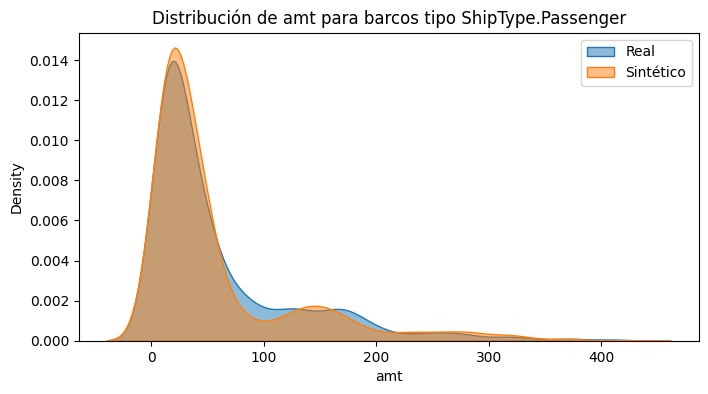

   - Generando gráfico para vs


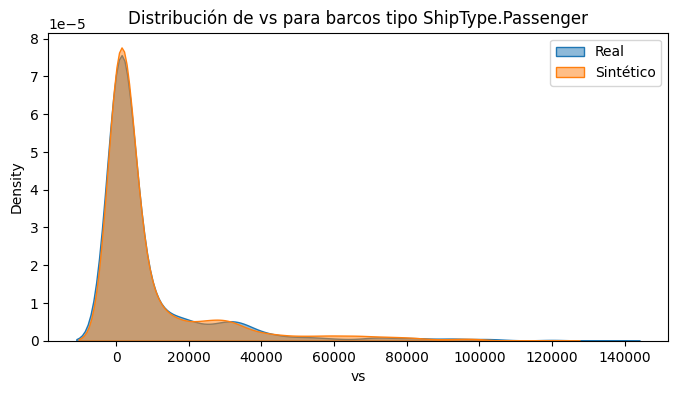

   - Generando gráfico para aol


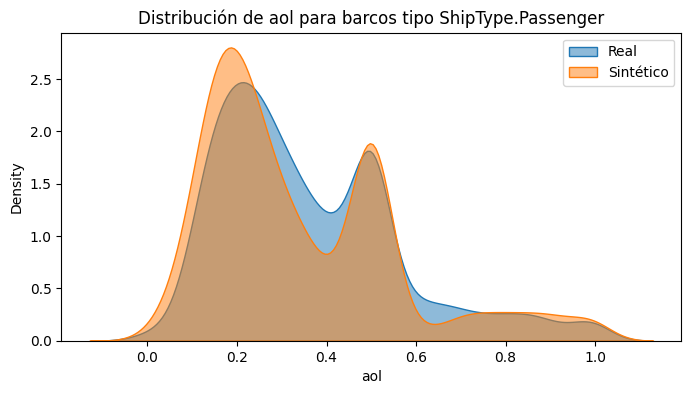

Procesando ShipType.Tanker...
   - Generando gráfico para draught


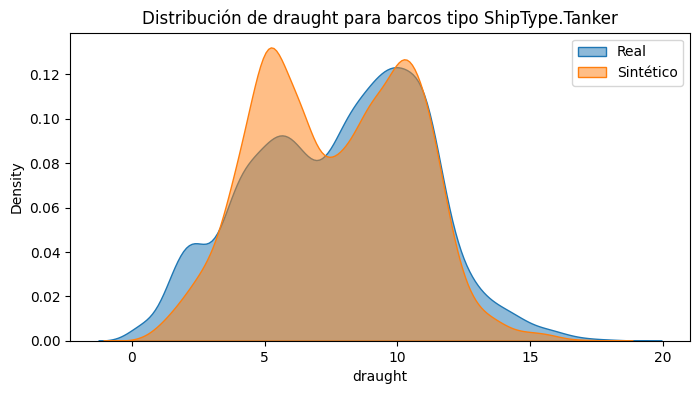

   - Generando gráfico para to_bow


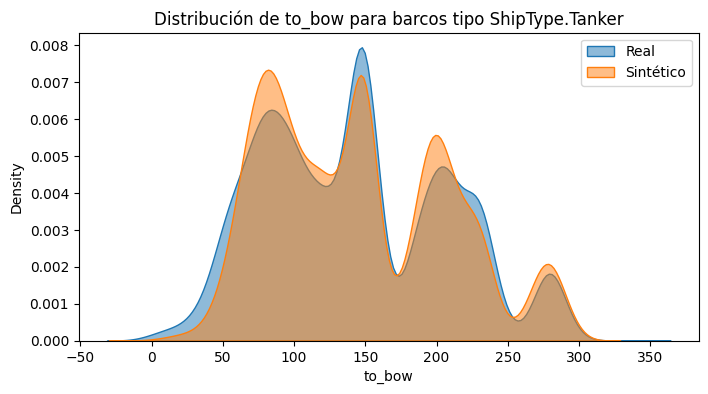

   - Generando gráfico para to_stern


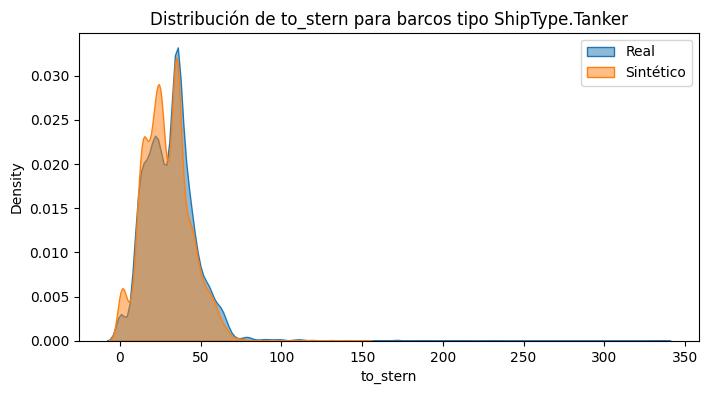

   - Generando gráfico para to_port


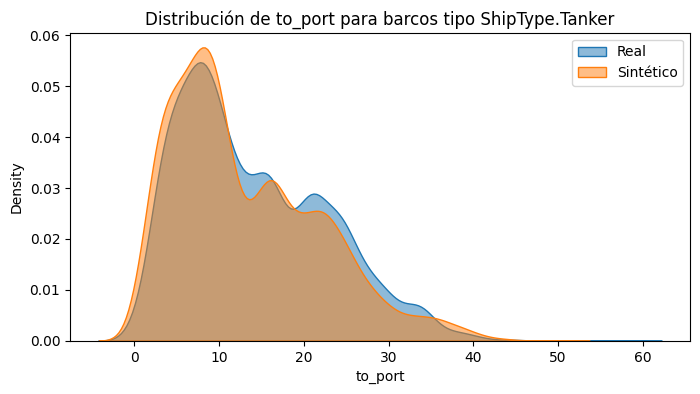

   - Generando gráfico para to_starboard


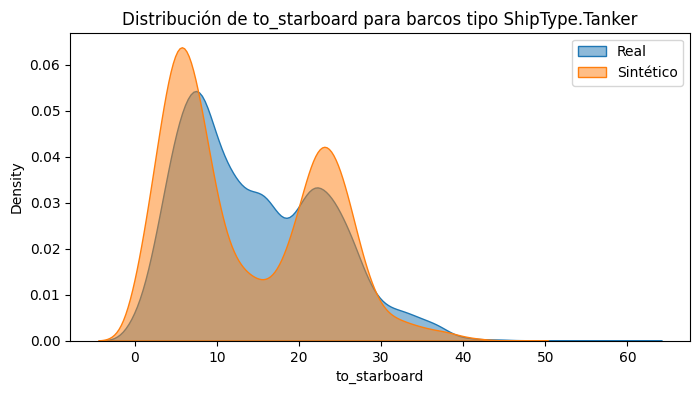

   - Generando gráfico para len


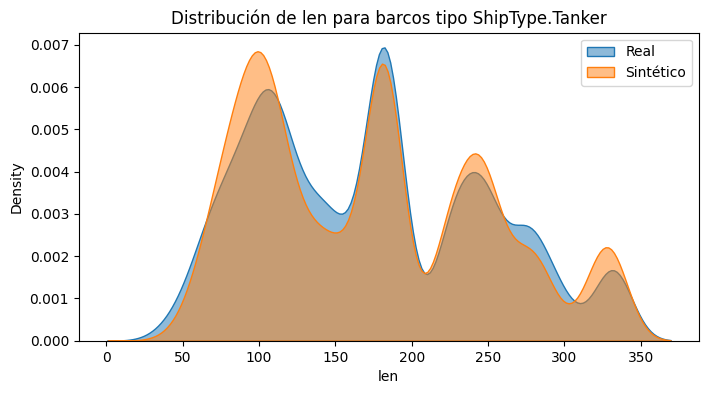

   - Generando gráfico para wid


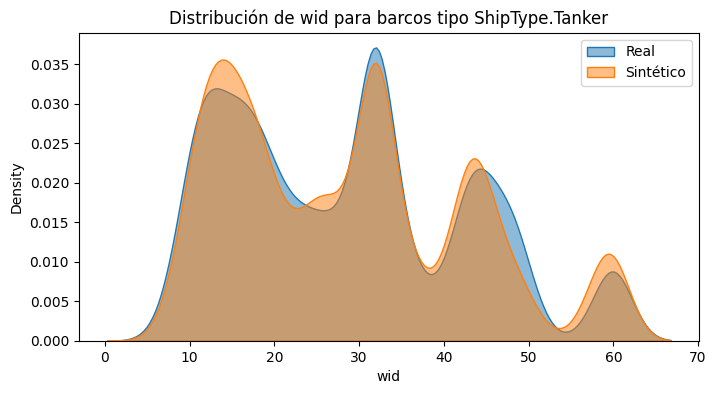

   - Generando gráfico para ldivw


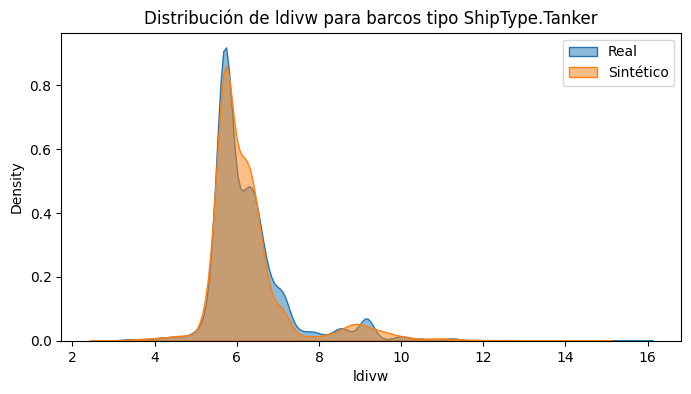

   - Generando gráfico para ldivd


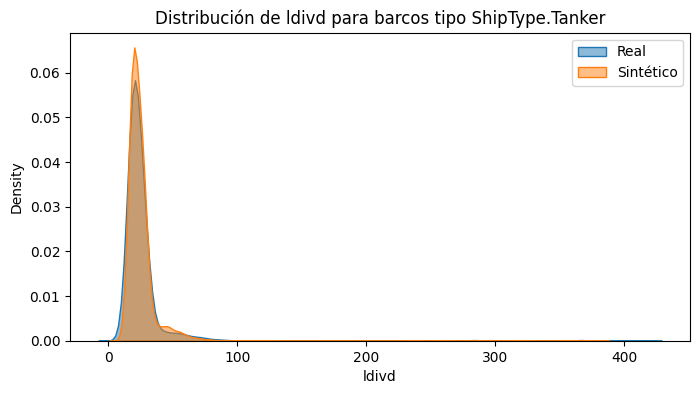

   - Generando gráfico para wdivd


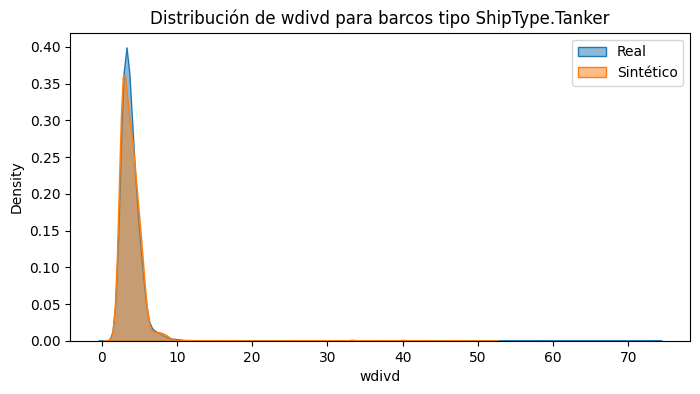

   - Generando gráfico para area


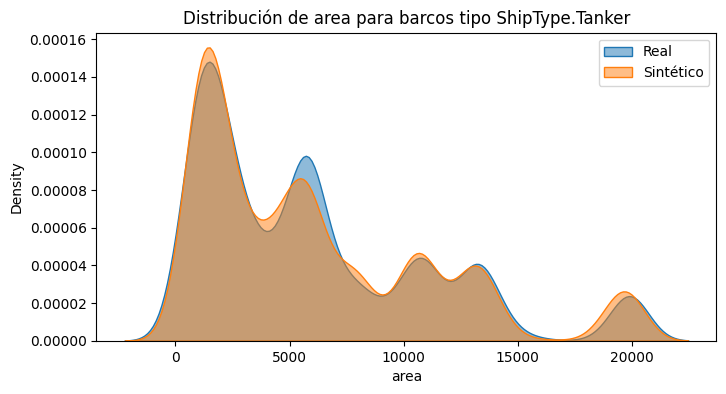

   - Generando gráfico para grith


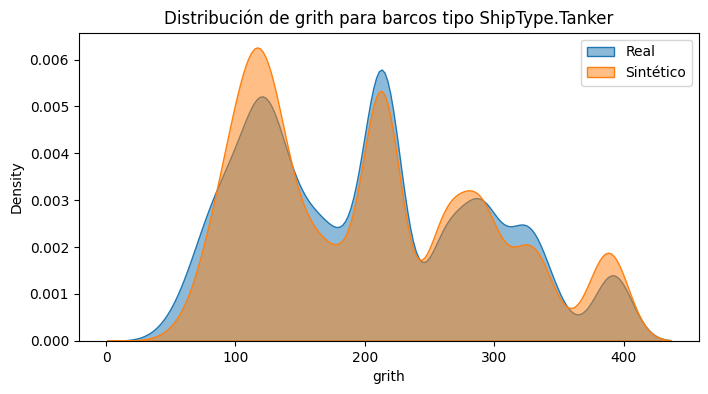

   - Generando gráfico para aml


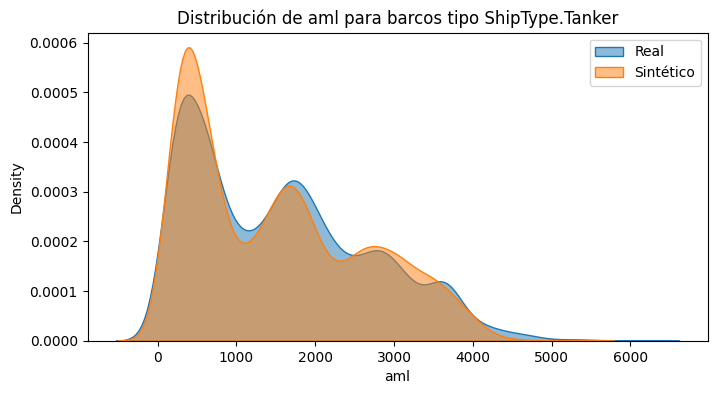

   - Generando gráfico para amt


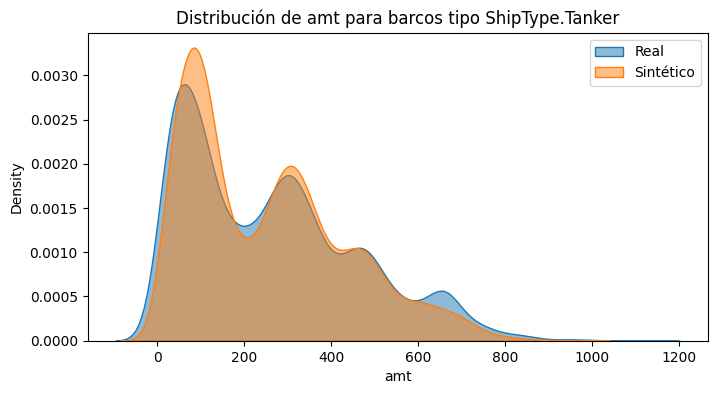

   - Generando gráfico para vs


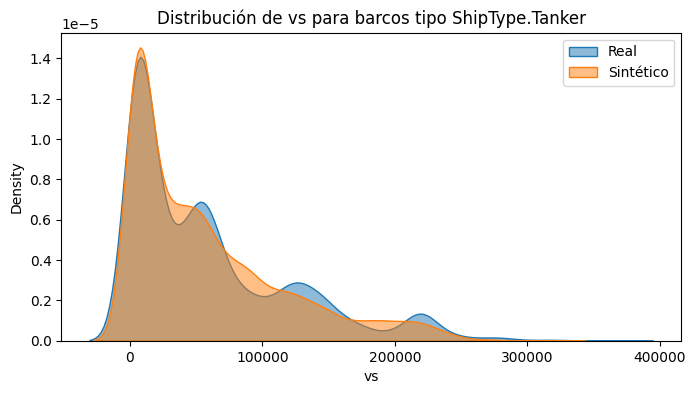

   - Generando gráfico para aol


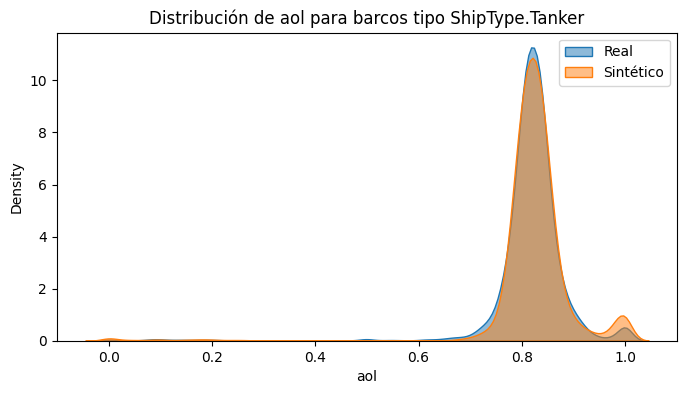

In [10]:
#Comparacion de distribuciones de cada parametro para cada tipo de barco
for shiptype in tipos_barco:
    print(f"Procesando {shiptype}...")  # Esto imprimirá cada barco que se está procesando
    df_real_tipo = df_real[df_real["shiptype"] == shiptype]
    df_synth_tipo = df_synth[df_synth["shiptype"] == shiptype]

    for column in df_real_tipo.select_dtypes(include=[np.number]).columns:
        print(f"   - Generando gráfico para {column}")  # Para ver qué columnas está procesando
        plt.figure(figsize=(8, 4))
        sns.kdeplot(df_real_tipo[column], label='Real', fill=True, alpha=0.5)
        
        if not df_synth_tipo.empty:
            sns.kdeplot(df_synth_tipo[column], label='Sintético', fill=True, alpha=0.5)
        
        plt.title(f'Distribución de {column} para barcos tipo {shiptype}')
        plt.legend()
        plt.show()

In [11]:
# Obtener los tipos de barco únicos en los datos reales y sintéticos
ship_types_synth = df_synth["shiptype"].unique()

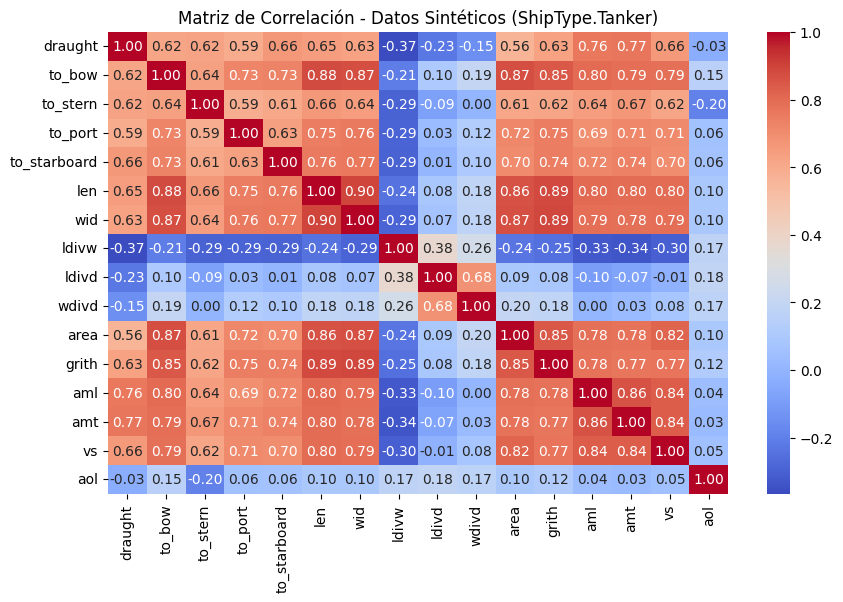

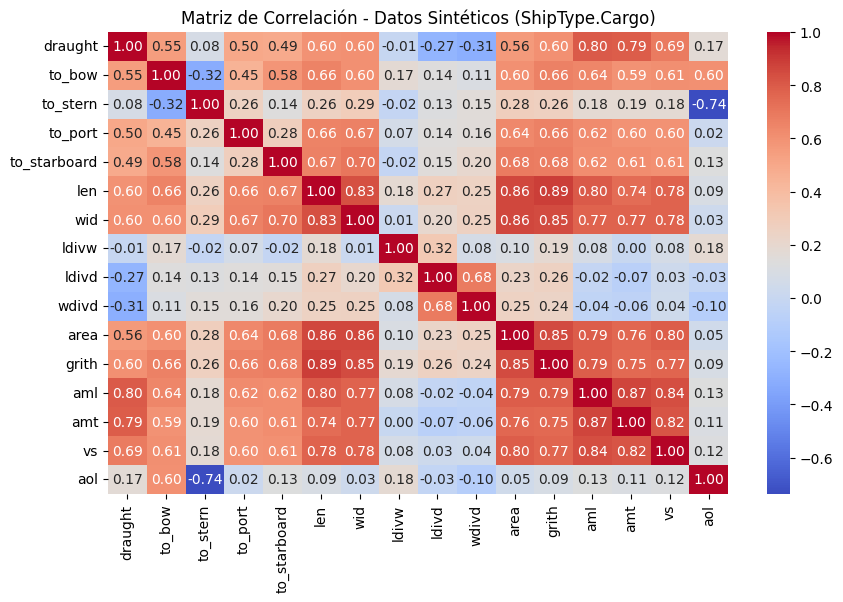

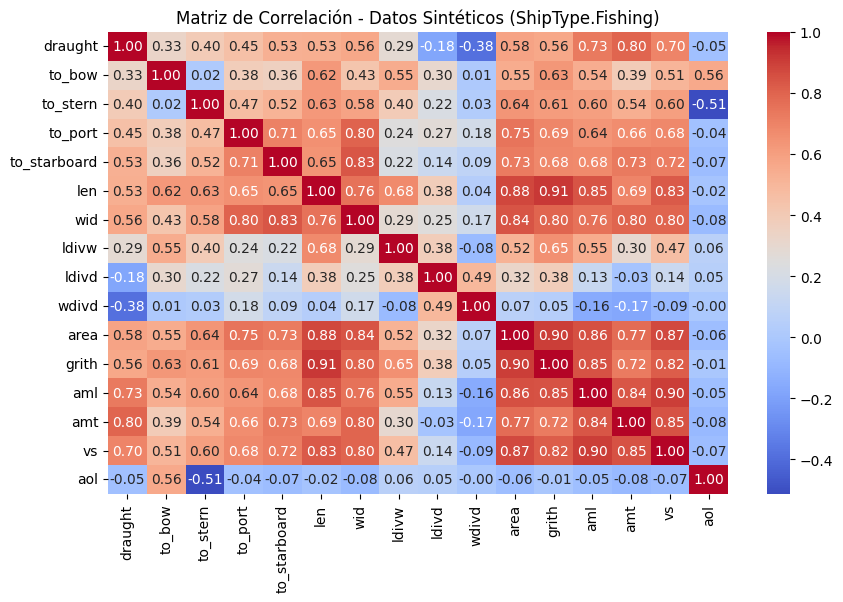

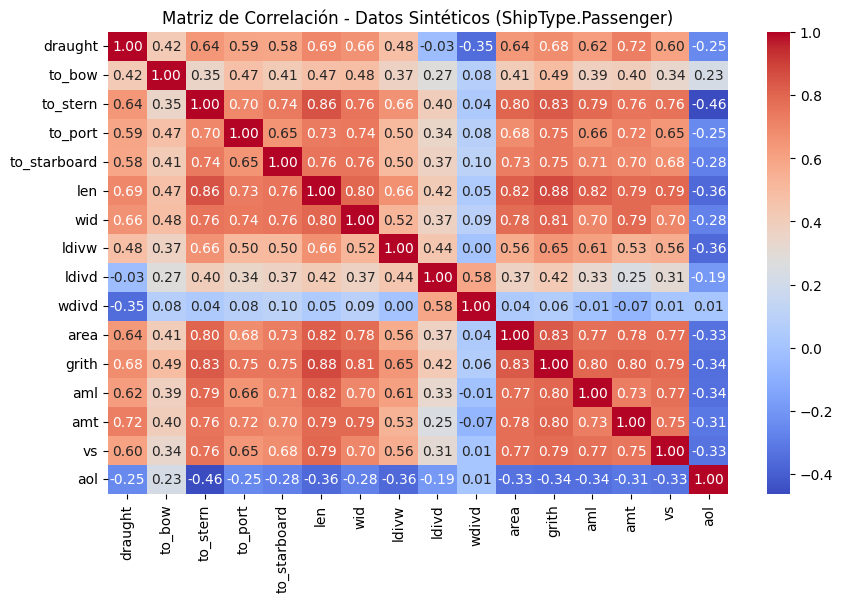

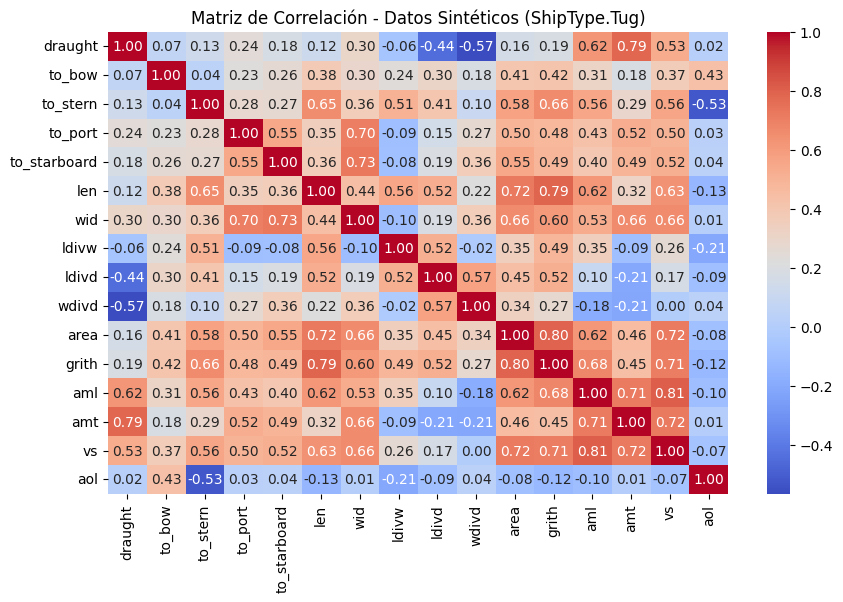

In [12]:
# Graficar las matrices de correlación

for ship in ship_types_synth:
    df_ship_synth = df_synth[df_synth["shiptype"] == ship].select_dtypes(include=[np.number])
    
    if not df_ship_synth.empty:
        plt.figure(figsize=(10, 6))
        sns.heatmap(df_ship_synth.corr(), cmap="coolwarm", annot=True, fmt=".2f")
        plt.title(f"Matriz de Correlación - Datos Sintéticos ({ship})")
        plt.show()

Evaluando tipo de barco: ShipType.Tug


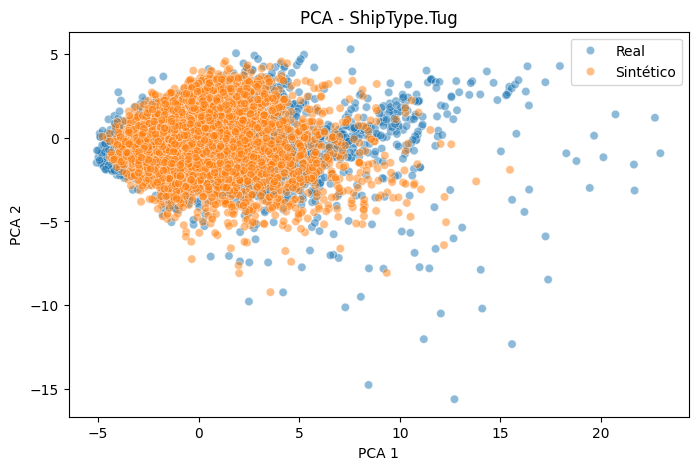

Evaluando tipo de barco: ShipType.Fishing


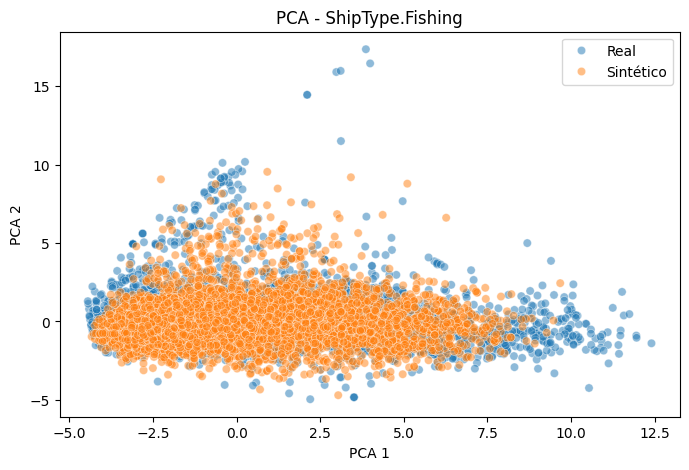

Evaluando tipo de barco: ShipType.Cargo


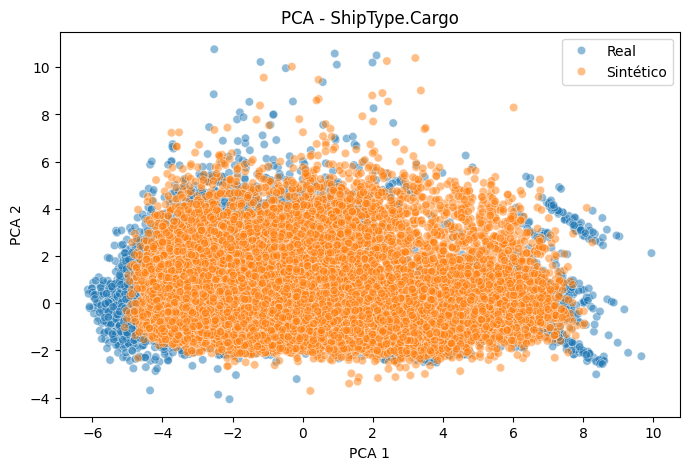

Evaluando tipo de barco: ShipType.Passenger


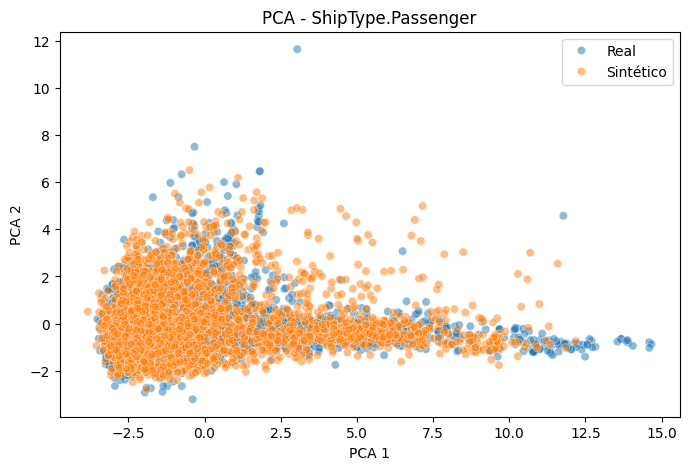

Evaluando tipo de barco: ShipType.Tanker


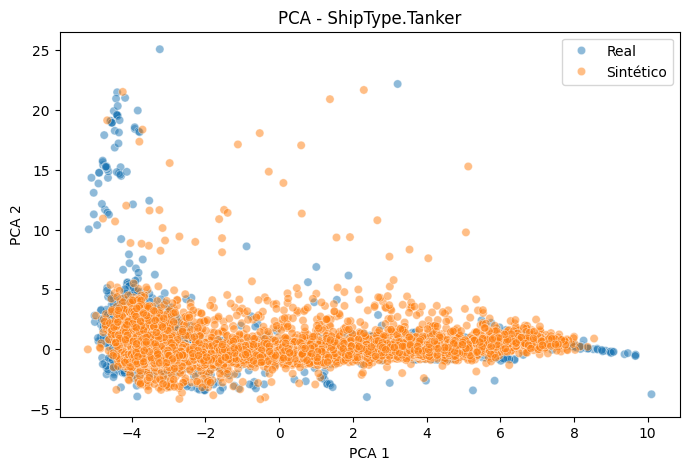

In [13]:
#PCA
#Iterar sobre los tipos de barco
for shiptype in tipos_barco:
    print(f"Evaluando tipo de barco: {shiptype}")

    # Filtrar los datos reales y sintéticos
    df_real_tipo = df_real[df_real["shiptype"] == shiptype].select_dtypes(include=[np.number])
    df_synth_tipo = df_synth[df_synth["shiptype"] == shiptype].select_dtypes(include=[np.number])

    # Unir los datos reales y sintéticos para PCA
    df_real_tipo["label"] = "Real"
    df_synth_tipo["label"] = "Sintético"
    df_combined = pd.concat([df_real_tipo, df_synth_tipo], ignore_index=True)

    # Normalizar los datos
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df_combined.drop(columns=["label"], errors="ignore"))

    # Aplicar PCA
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(df_scaled)

    # Agregar los resultados al DataFrame combinado
    df_combined["PCA1"] = pca_result[:, 0]
    df_combined["PCA2"] = pca_result[:, 1]

    # Graficar PCA diferenciando reales y sintéticos
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df_combined, x="PCA1", y="PCA2", hue="label", alpha=0.5)
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.title(f"PCA - {shiptype}")
    plt.legend()
    plt.show()

Evaluando tipo de barco: ShipType.Tug


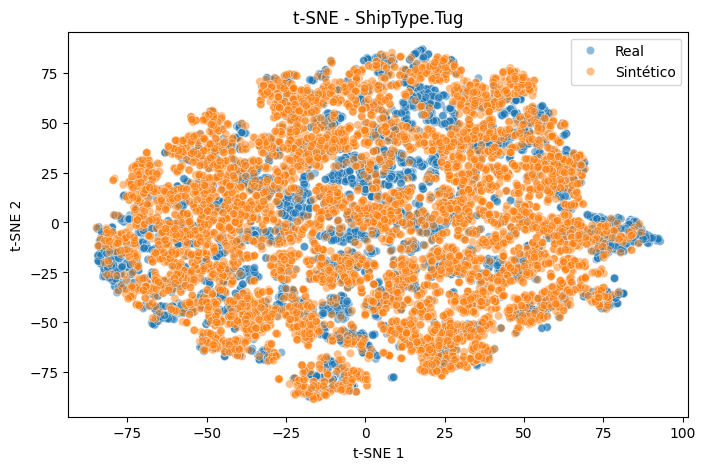

Evaluando tipo de barco: ShipType.Fishing


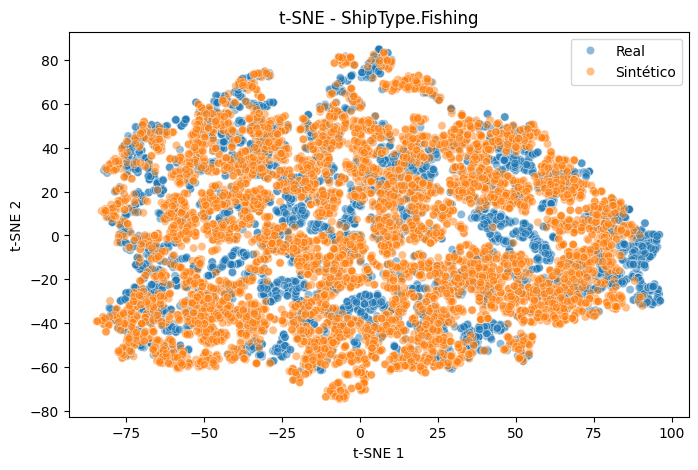

Evaluando tipo de barco: ShipType.Cargo


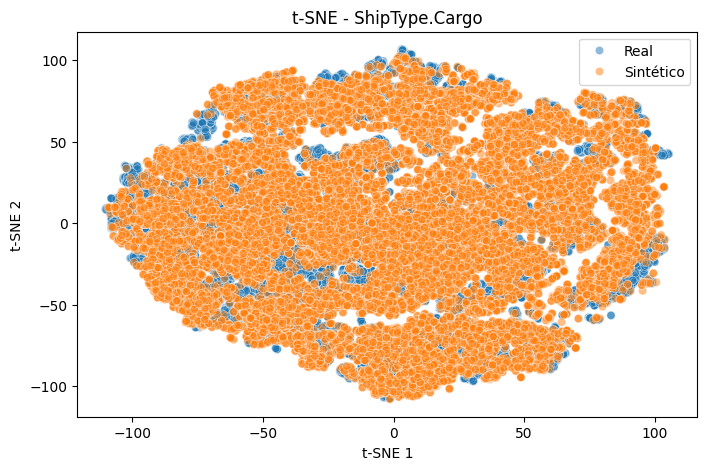

Evaluando tipo de barco: ShipType.Passenger


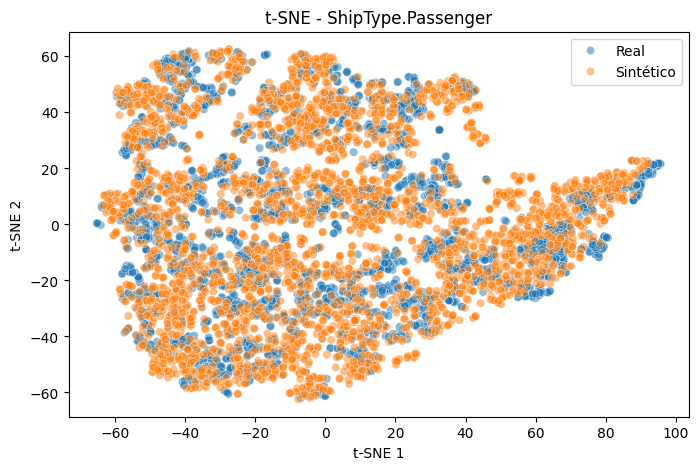

Evaluando tipo de barco: ShipType.Tanker


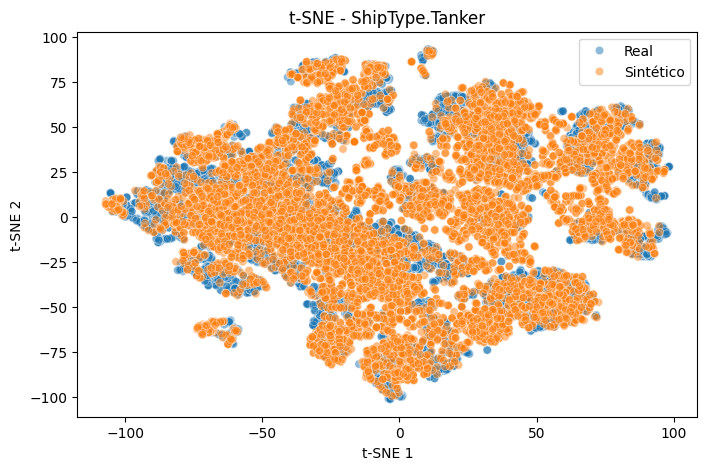

In [14]:
# t-SNE para visualización más detallada
# Iterar sobre los tipos de barco
for shiptype in tipos_barco:
    print(f"Evaluando tipo de barco: {shiptype}")

    # Filtrar los datos reales y sintéticos
    df_real_tipo = df_real[df_real["shiptype"] == shiptype].select_dtypes(include=[np.number])
    df_synth_tipo = df_synth[df_synth["shiptype"] == shiptype].select_dtypes(include=[np.number])

    # Normalizar los datos
    scaler = StandardScaler()
    df_scaled_real = scaler.fit_transform(df_real_tipo)  # Normalizar los datos reales
    df_scaled_synth = scaler.transform(df_synth_tipo)  # Normalizar los datos sintéticos

    # Concatenar los datos para aplicar t-SNE
    df_combined = np.vstack((df_scaled_real, df_scaled_synth))  # Combinar matrices
    labels = ['Real'] * df_scaled_real.shape[0] + ['Sintético'] * df_scaled_synth.shape[0]  # Crear etiquetas

    # Aplicar t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    tsne_result = tsne.fit_transform(df_combined)

    # Crear un DataFrame con los resultados de t-SNE
    df_tsne = pd.DataFrame(tsne_result, columns=['tSNE1', 'tSNE2'])
    df_tsne['label'] = labels  # Añadir las etiquetas

    # Graficar t-SNE diferenciando reales y sintéticos
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df_tsne, x='tSNE1', y='tSNE2', hue='label', alpha=0.5)
    plt.xlabel("t-SNE 1")
    plt.ylabel("t-SNE 2")
    plt.title(f't-SNE - {shiptype}')
    plt.legend()
    plt.show()

In [15]:
#CHI-CUADRADO
# Contar ocurrencias de cada shiptype en los datos reales y sintéticos 
freq_real = df_real['shiptype'].value_counts().sort_index() 
freq_synth = df_synth['shiptype'].value_counts().sort_index() 

# Unir ambas distribuciones en un DataFrame 
freq_df = pd.DataFrame({'Real': freq_real, 'Sintético': freq_synth}).fillna(0) 

# Aplicar la prueba de chi-cuadrado 
chi2_stat, p_value, dof, expected = stats.chi2_contingency(freq_df) 

# Mostrar resultados 
print("Estadístico Chi-cuadrado:", chi2_stat) 
print("Grados de libertad:", dof) 
print("Valor p:", p_value) 

# Interpretación 
alpha = 0.05  # Nivel de significancia 
if p_value < alpha: 
    print("⚠️ Rechazamos la hipótesis nula: hay diferencias significativas entre las distribuciones.") 
else:
    print("✅ No se rechaza la hipótesis nula: las distribuciones son similares.") 

Estadístico Chi-cuadrado: 4.0988078529712404e-05
Grados de libertad: 4
Valor p: 0.9999999997900001
✅ No se rechaza la hipótesis nula: las distribuciones son similares.


In [16]:
#KS-Test
# Obtener los tipos de barco únicos
tipos_barco = df_real["shiptype"].unique()

# Diccionario para almacenar resultados
ks_results = {}

# Aplicar KS-Test a cada tipo de barco y cada variable numérica
for shiptype in tipos_barco:
    print(f"\n📊 KS-Test para el tipo de barco: {shiptype}\n")
    
    df_real_tipo = df_real[df_real["shiptype"] == shiptype]
    df_synth_tipo = df_synth[df_synth["shiptype"] == shiptype]

    # Asegurar que solo se usen columnas numéricas
    columnas_numericas = df_real_tipo.select_dtypes(include=[np.number]).columns

    for column in columnas_numericas:
        if column in df_synth_tipo.columns:  # Evitar errores si la columna no existe en los sintéticos
            ks_stat, p_value = ks_2samp(df_real_tipo[column], df_synth_tipo[column])
            print(f"{column}: KS-Statistic={ks_stat:.4f}, P-Value={p_value:.4f}")
            ks_results[(shiptype, column)] = {"KS-Statistic": ks_stat, "P-Value": p_value}

# Convertir los resultados en un DataFrame y guardarlos en CSV
ks_df = pd.DataFrame.from_dict(ks_results, orient="index")
ks_df.to_csv("ks_test_results_TVAE.csv")

print("\n✅ Resultados guardados en 'ks_test_results_TVAE.csv'.")


📊 KS-Test para el tipo de barco: ShipType.Tug

draught: KS-Statistic=0.0695, P-Value=0.0000
to_bow: KS-Statistic=0.0727, P-Value=0.0000
to_stern: KS-Statistic=0.0587, P-Value=0.0000
to_port: KS-Statistic=0.1113, P-Value=0.0000
to_starboard: KS-Statistic=0.1407, P-Value=0.0000
len: KS-Statistic=0.0544, P-Value=0.0000
wid: KS-Statistic=0.1175, P-Value=0.0000
ldivw: KS-Statistic=0.0567, P-Value=0.0000
ldivd: KS-Statistic=0.0329, P-Value=0.0026
wdivd: KS-Statistic=0.0815, P-Value=0.0000
area: KS-Statistic=0.0739, P-Value=0.0000
grith: KS-Statistic=0.0397, P-Value=0.0001
aml: KS-Statistic=0.0310, P-Value=0.0056
amt: KS-Statistic=0.0547, P-Value=0.0000
vs: KS-Statistic=0.0353, P-Value=0.0010
aol: KS-Statistic=0.0943, P-Value=0.0000

📊 KS-Test para el tipo de barco: ShipType.Fishing

draught: KS-Statistic=0.0898, P-Value=0.0000
to_bow: KS-Statistic=0.0974, P-Value=0.0000
to_stern: KS-Statistic=0.0565, P-Value=0.0000
to_port: KS-Statistic=0.1898, P-Value=0.0000
to_starboard: KS-Statistic=0.21

In [19]:
# Agrupar por shiptype y calcular estadísticas descriptivas SOLO para los datos sintéticos
stats_synth = df_synth.groupby("shiptype").describe()

# Mostrar estadísticas de cada tipo de barco en los datos sintéticos
for shiptype in df_synth["shiptype"].unique():
    print(f"\n📊 Estadísticas para {shiptype} (Datos Sintéticos):\n")
    print(stats_synth.loc[shiptype])
    print("\n" + "-"*80 + "\n")  # Separador entre barcos


📊 Estadísticas para ShipType.Tanker (Datos Sintéticos):

draught  count    9903.000000
         mean        7.670321
         std         2.897984
         min         0.300000
         25%         5.268345
                     ...     
aol      min         0.000000
         25%         0.800461
         50%         0.822814
         75%         0.845176
         max         1.000000
Name: ShipType.Tanker, Length: 128, dtype: float64

--------------------------------------------------------------------------------


📊 Estadísticas para ShipType.Cargo (Datos Sintéticos):

draught  count    24353.000000
         mean         7.368106
         std          2.569451
         min          1.500000
         25%          5.326147
                      ...     
aol      min          0.000000
         25%          0.768250
         50%          0.842154
         75%          0.861324
         max          0.999601
Name: ShipType.Cargo, Length: 128, dtype: float64

-----------------------------

In [20]:
stats_synth.to_csv("estadisticas_descriptivas_completo_TVAE.csv")
print("✅ Estadísticas guardadas en 'estadisticas_descriptivas_completo_TVAE.csv'")

✅ Estadísticas guardadas en 'estadisticas_descriptivas_completo_TVAE.csv'


OTRAS PRUEBAS

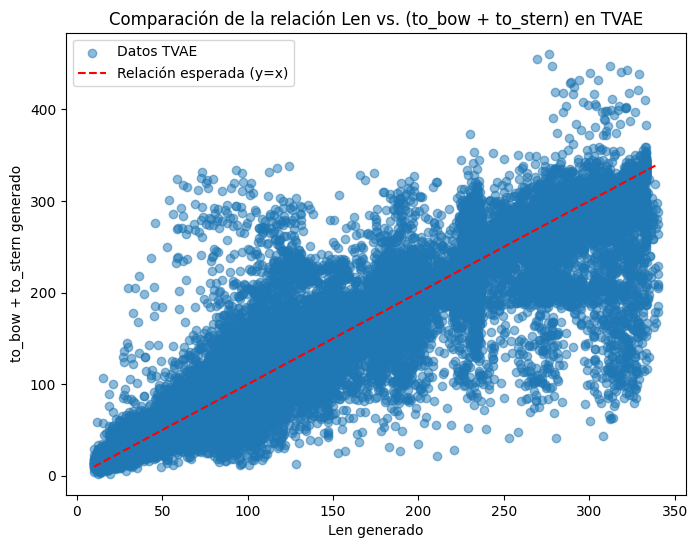


 Estadísticas del error en la relación Len:
count    49997.000000
mean         2.660431
std         32.610961
min       -266.048986
25%         -7.873888
50%          0.870572
75%         11.089211
max        264.242748
Name: error_len, dtype: float64


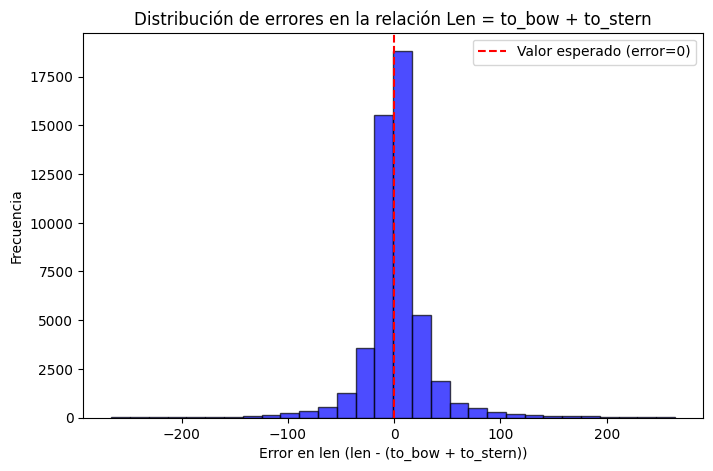

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo generado por TVAE para el Archivo Final
file_path = "synthetic_static_completo_TVAE.csv"  
df_TVAE_final = pd.read_csv(file_path)

# Asegurar que las columnas necesarias están presentes
required_columns = ["len", "to_bow", "to_stern"]
missing_columns = [col for col in required_columns if col not in df_TVAE_final.columns]

if missing_columns:
    raise ValueError(f"Faltan las siguientes columnas en el archivo: {missing_columns}")

# Calcular la diferencia entre 'len' y 'to_bow + to_stern'
df_TVAE_final["error_len"] = df_TVAE_final["len"] - (df_TVAE_final["to_bow"] + df_TVAE_final["to_stern"])

# Generar scatterplot para visualizar la relación esperada vs. generada
plt.figure(figsize=(8, 6))
plt.scatter(df_TVAE_final["len"], df_TVAE_final["to_bow"] + df_TVAE_final["to_stern"], alpha=0.5, label="Datos TVAE")
plt.plot([df_TVAE_final["len"].min(), df_TVAE_final["len"].max()],
         [df_TVAE_final["len"].min(), df_TVAE_final["len"].max()],
         color='red', linestyle='dashed', label="Relación esperada (y=x)")
plt.xlabel("Len generado")
plt.ylabel("to_bow + to_stern generado")
plt.title("Comparación de la relación Len vs. (to_bow + to_stern) en TVAE")
plt.legend()
plt.show()

# Mostrar estadísticas de los errores
error_stats = df_TVAE_final["error_len"].describe()
print("\n Estadísticas del error en la relación Len:")
print(error_stats)

# Mostrar distribución del error
plt.figure(figsize=(8, 5))
plt.hist(df_ctgan_final["error_len"], bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(0, color='red', linestyle='dashed', label="Valor esperado (error=0)")
plt.xlabel("Error en len (len - (to_bow + to_stern))")
plt.ylabel("Frecuencia")
plt.title("Distribución de errores en la relación Len = to_bow + to_stern")
plt.legend()
plt.show()
